In [ ]:
import numpy as np
from matplotlib import pyplot as plt 
from scipy import stats 
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
datafile1 = pd.read_csv("/content/drive/MyDrive/Data_Mining_Assignment_03/data1.csv",header=None)
datafile2 = pd.read_csv("/content/drive/MyDrive/Data_Mining_Assignment_03/data2.csv",header=None)
datafile3 = pd.read_csv("/content/drive/MyDrive/Data_Mining_Assignment_03/data3.csv",header=None)
datafile4 = pd.read_csv("/content/drive/MyDrive/Data_Mining_Assignment_03/data4.csv",header=None)
datafile5 = pd.read_csv("/content/drive/MyDrive/Data_Mining_Assignment_03/data5.csv",header=None)

# 1. Apply logistic regression and LDA on Data 1, Data 2, Data 3 and Data 4.

(a) Report sensitivity, specificity, precision and F measure. Plot ROC curve.

(b) Plot decision boundaries for all data.

(c) Plot the logistic regression curve for all data.

(d) Plot multivariate Gaussian density function corresponding to the positive & negative classes and their contours for Data 3.

(e) Compare the performance of logistic regression and LDA by statistical measures.

(f) Report the values of the parameters of the final models.

(g) Apply first order and second order optimization techniques in the case of logistic regression. Compare the performance of those two techniques in terms of
memory and time.

In [ ]:
datafile1

,0,1,2
0,6,32,1
1,26,39,1
2,2,38,1
3,25,39,1
4,3,35,1
...,...,...,...
195,47,17,-1
196,24,27,-1
197,18,18,-1
198,19,7,-1


In [ ]:
datafile1[0] = (np.array(datafile1[0]) - np.mean(datafile1[0])) / np.std(datafile1[0])

datafile1[1] = (np.array(datafile1[1]) - np.mean(datafile1[1])) / np.std(datafile1[1])

In [ ]:
datafile1.insert(0,"x0",1)

In [ ]:
datafile1

,x0,0,1,2
0,1,-1.306664,0.368038,1
1,1,0.061929,0.837731,1
2,1,-1.580382,0.770632,1
3,1,-0.006501,0.837731,1
4,1,-1.511952,0.569335,1
...,...,...,...,...
195,1,1.498951,-0.638447,-1
196,1,-0.074930,0.032543,-1
197,1,-0.485508,-0.571348,-1
198,1,-0.417079,-1.309437,-1


In [ ]:
datafile1[2]=datafile1[2].replace(-1,0)

In [ ]:
datafile1

,x0,0,1,2
0,1,-1.306664,0.368038,1
1,1,0.061929,0.837731,1
2,1,-1.580382,0.770632,1
3,1,-0.006501,0.837731,1
4,1,-1.511952,0.569335,1
...,...,...,...,...
195,1,1.498951,-0.638447,0
196,1,-0.074930,0.032543,0
197,1,-0.485508,-0.571348,0
198,1,-0.417079,-1.309437,0


In [ ]:
data1 = np.array(datafile1)
np.random.shuffle(data1)

In [ ]:
alpha_data = [[],[]]
for a in [0.000001,0.00001,0.00005,0.0001,0.0005,0.001,0.005,0.01,0.05,0.1,0.5,1,2,3,4]:
  w = np.random.random(len(data1[0])-1)
  for i in range(10):
    np.random.shuffle(data1)
    training_data = data1[:int(0.8*len(data1))]
    
    for i in range(len(training_data)):
      #print(np.inner(w,training_data[i][:-1]))
      try:
        f = 1 / ( 1+ np.exp(-(np.inner(w,training_data[i][:-1]))))
      
        delta = a * ( training_data[i][-1] - f ) * training_data[i][:-1]
        w += delta
      except:
        print("Excepted")

  cost_fn = 0
  validation_data = data1[int(0.8*len(data1)):]
  for i in range(len(validation_data)):
    f = 1 / ( 1+ np.exp(-(np.inner(w,validation_data[i][:-1]))) )
    y = validation_data[i][-1]
    if y:
      cost_fn -= y * np.log(f)
    else:
      cost_fn -= (1-y) * np.log(1-f)
  
  alpha_data[0].append(a)
  alpha_data[1].append(cost_fn)

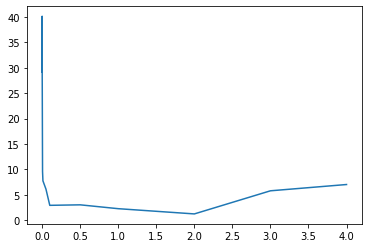

In [ ]:
plt.plot(alpha_data[0],alpha_data[1])
plt.show()

In [ ]:
import datetime 
start_lr = datetime.datetime.now()
a = 0.5
w = np.random.random(len(data1[0])-1)
training = data1[:int(0.8*len(data1))]
while(1):


  np.random.shuffle(training)
  training_data = training[:int(0.6*len(training))]
  validation_data = training[int(0.6*len(training)):]


  for i in range(len(training_data)):
    f = 1 / ( 1+ np.exp(-(np.inner(w,training_data[i][:-1]))) )
   
    delta = a * ( training_data[i][-1] - f ) * training_data[i][:-1]
    w += delta

  try:
    cost_fn_old = cost_fn 
  except:
    cost_fn_old = 1
  cost_fn = 0
  for i in range(len(validation_data)):
    f = 1 / ( 1+ np.exp(-(np.inner(w,validation_data[i][:-1]))) )
    y = validation_data[i][-1]
    if y:
      cost_fn -= y * np.log(f)
    else:
      cost_fn -= (1-y) * np.log(1-f)

  print("cost_fn",cost_fn)
  if abs(cost_fn) < 0.1 and cost_fn_old < 0.1:
    break 
stop_lr = datetime.datetime.now() - start_lr

cost_fn 9.051171144541371
cost_fn 8.810929496543658
cost_fn 5.818921526386988
cost_fn 5.4313507099745815
cost_fn 3.6925640781959173
cost_fn 3.0670944428080453
cost_fn 4.758128665543848
cost_fn 4.250007017769312
cost_fn 4.878148751011497
cost_fn 3.5400386137304345
cost_fn 3.796431783584668
cost_fn 4.035223952247741
cost_fn 4.270533425827475
cost_fn 4.572876648374263
cost_fn 5.000815562124676
cost_fn 2.97528904836132
cost_fn 2.690990918423341
cost_fn 2.5453137036047178
cost_fn 4.977747809459524
cost_fn 2.8188761653152916
cost_fn 4.596473412893134
cost_fn 5.527077958902872
cost_fn 7.838051256948833
cost_fn 3.9290186525940975
cost_fn 3.647615878866998
cost_fn 2.6774668703283355
cost_fn 2.0088696251135896
cost_fn 3.6853101748976127
cost_fn 4.7703529883983276
cost_fn 4.508052931104859
cost_fn 3.3702857855029076
cost_fn 3.50230140851595
cost_fn 3.0647855890659947
cost_fn 4.03285693903128
cost_fn 2.933819805973164
cost_fn 4.828972255240728
cost_fn 4.05402848662556
cost_fn 3.234904123158518
cos

In [ ]:
stop_lr

datetime.timedelta(seconds=9, microseconds=667272)

In [ ]:
print(w)

[ -9.90370477 -77.39846553  68.76429944]


In [ ]:
testing_data = data1[int(0.8*len(data1)):]
TP = 0
FP = 0
TN = 0
FN = 0
roc_data = [[],[]]
for i in range(len(testing_data)):
  y = np.inner(w,testing_data[i][:-1])
  roc_data[0].append(testing_data[i][-1])
  roc_data[1].append(1 / ( 1+ np.exp(-y)))
  if y>=0 and testing_data[i][-1]==1:
    TP += 1
  elif y>=0 and testing_data[i][-1]==0:
    FP += 1
  elif y<0 and testing_data[i][-1]==1:
    FN += 1
  elif y<0 and testing_data[i][-1]==0:
    TN += 1

In [ ]:
print(TP,FP,TN,FN)

19 0 21 0


In [ ]:
Sensitivity = TP/(TP+FN)
print(f"Sensitivity is {Sensitivity}")

Specificity = TN/(TN+FP)
print(f"Specificity is {Specificity}")

Precision = TP/(TP+FP)
print(f"Precision is {Precision}")

F_score = (2*Precision*Sensitivity)/(Precision+Sensitivity)
print(f"F-score is {F_score}")

Sensitivity is 1.0
Specificity is 1.0
Precision is 1.0
F-score is 1.0


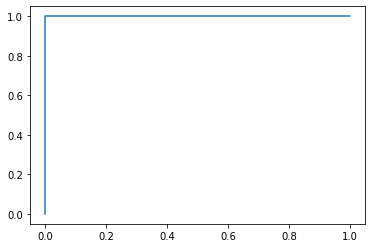

In [ ]:
from sklearn.metrics import roc_curve

fpr,tpr,th = roc_curve(roc_data[0],roc_data[1])

plt.plot(fpr,tpr)
plt.show()

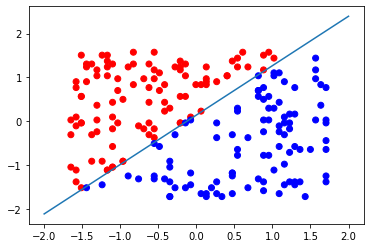

In [ ]:
c = ["r" if i[3] == 1 else "b" for i in np.array(datafile1)]
x1 = np.linspace(-2,2,100)
x2 = -(w[0]+w[1]*x1)/w[2]
plt.scatter(np.array(datafile1[0]) , np.array(datafile1[1]) ,c=c )
plt.plot(x1,x2)
plt.show()

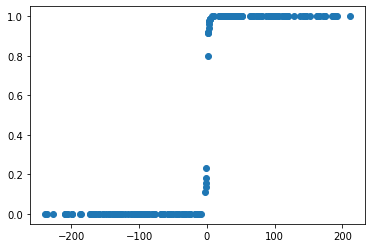

In [ ]:
data_for_plot = [[],[]]
for i in range(len(data1)):
  t = np.inner(w,data1[i][:-1])
  f = 1 / ( 1+ np.exp(-t) )
  data_for_plot[0].append(t)
  data_for_plot[1].append(f)
plt.scatter(data_for_plot[0],data_for_plot[1])
plt.show()

**Newton Method. Second order approximation**

In [ ]:
alpha_data = [[],[]]
for a in [0.000001,0.00001,0.00005,0.0001,0.0005,0.001,0.005,0.01,0.05,0.1,0.5,1,2,3,4]:
  w = np.random.random(len(data1[0])-1)
  for j in range(10):
    np.random.shuffle(data1)
    training_data = data1[:int(0.8*len(data1))]
    dL = np.zeros(len(data1[0])-1)
    H = np.zeros(((len(w),len(w))))
    for i in range(len(training_data)):
      #print(np.inner(w,training_data[i][:-1]))
      try:
        x = training_data[i][:-1]
        f = 1 / ( 1+ np.exp(-(np.inner(w,x))))
        y = training_data[i][-1]
        dL +=  (y*(1-f)- (1-y)*f)* x
        for k in range(len(H)):
          for m in range(len(H[0])):
            H[k][m] += -f*(1-f)* x[k]*x[m]
      except:
        print("Excepted")
    try:
      w = w - np.matmul( np.linalg.inv(H) , dL)
    except Exception as e:
      print(H)
      print(dL)
      print(w)
      print(e)
      breakpoint

  cost_fn = 0
  validation_data = data1[int(0.8*len(data1)):]
  for i in range(len(validation_data)):
    f = 1 / ( 1+ np.exp(-(np.inner(w,validation_data[i][:-1]))) )
    y = validation_data[i][-1]
    if y:
      cost_fn -= y * np.log(f)
    else:
      cost_fn -= (1-y) * np.log(1-f)
  
  alpha_data[0].append(a)
  alpha_data[1].append(cost_fn)

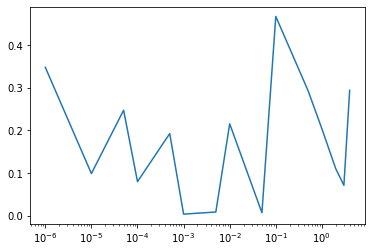

In [ ]:
ax = plt.figure().gca()
ax.plot(alpha_data[0],alpha_data[1])
ax.set_xscale("log")
plt.show()

In [ ]:
import datetime
start = datetime.datetime.now()
a = 10**(-3)
w = np.random.random(len(data1[0])-1)
training = data1[:int(0.8*len(data1))]
while(1):


  np.random.shuffle(training)
  training_data = training[:int(0.6*len(training))]
  validation_data = training[int(0.6*len(training)):]
  dL = np.zeros(len(data1[0])-1)
  H = np.zeros(((len(w),len(w))))
  for i in range(len(training_data)):
      #print(np.inner(w,training_data[i][:-1]))
      try:
        x = training_data[i][:-1]
        f = 1 / ( 1+ np.exp(-(np.inner(w,x))))
        y = training_data[i][-1]
        dL +=  (y*(1-f)- (1-y)*f)* x
        for k in range(len(H)):
          for m in range(len(H[0])):
            H[k][m] += -f*(1-f)* x[k]*x[m]
      except:
        print("Excepted")
  try:
      w = w - np.matmul( np.linalg.inv(H) , dL)
  except Exception as e:
      print(H)
      print(dL)
      print(w)
      print(e)
      break

  try:
    cost_fn_old = cost_fn 
  except:
    cost_fn_old = 1
  cost_fn = 0
  for i in range(len(validation_data)):
    f = 1 / ( 1+ np.exp(-(np.inner(w,validation_data[i][:-1]))) )
    y = validation_data[i][-1]
    if y:
      cost_fn -= y * np.log(f)
    else:
      cost_fn -= (1-y) * np.log(1-f)

  print("cost_fn",cost_fn)
  if abs(cost_fn) < 0.1 and cost_fn_old < 0.1:
    break 
stop = datetime.datetime.now() -start

cost_fn 17.234621910622643
cost_fn 12.80136042443638
cost_fn 7.376881046828036
cost_fn 8.357322599004934
cost_fn 3.445254687134628
cost_fn 4.996914558820768
cost_fn 3.6227039525245917
cost_fn 0.5820650047186389
cost_fn 0.4874096595531178
cost_fn 0.26930947353941864
cost_fn 0.07110403654495696
cost_fn 0.0


In [ ]:
stop

datetime.timedelta(microseconds=88217)

In [ ]:
print("Time taken for logistic regression",stop_lr)
print("Time taken for Newton method",stop)

Time taken for logistic regression 0:00:09.667272
Time taken for Newton method 0:00:00.088217


In [ ]:
print(w)

[ -26.79704996 -200.89687568  178.1195648 ]


In [ ]:
testing_data = data1[int(0.8*len(data1)):]
TP = 0
FP = 0
TN = 0
FN = 0

for i in range(len(testing_data)):
  y = np.inner(w,testing_data[i][:-1])
  if y>=0 and testing_data[i][-1]==1:
    TP += 1
  elif y>=0 and testing_data[i][-1]==0:
    FP += 1
  elif y<0 and testing_data[i][-1]==1:
    FN += 1
  elif y<0 and testing_data[i][-1]==0:
    TN += 1

In [ ]:
print(TP,FP,TN,FN)

19 0 21 0


In [ ]:
Sensitivity = TP/(TP+FN)
print(f"Sensitivity is {Sensitivity}")

Specificity = TN/(TN+FP)
print(f"Specificity is {Specificity}")

Precision = TP/(TP+FP)
print(f"Precision is {Precision}")

F_score = (2*Precision*Sensitivity)/(Precision+Sensitivity)
print(f"F-score is {F_score}")

Sensitivity is 1.0
Specificity is 1.0
Precision is 1.0
F-score is 1.0


**LDA on DATA 1**

In [ ]:
datafile1 = pd.read_csv("/content/drive/MyDrive/Data_Mining_Assignment_03/data1.csv",header=None)

In [ ]:
datafile1[2]=datafile1[2].replace(-1,0)

In [ ]:
datafile1

,0,1,2
0,6,32,1
1,26,39,1
2,2,38,1
3,25,39,1
4,3,35,1
...,...,...,...
195,47,17,0
196,24,27,0
197,18,18,0
198,19,7,0


In [ ]:
x = dict(datafile1[2].value_counts())

In [ ]:
x

{0: 100, 1: 100}

In [ ]:
pi_1 = x[1] / x[0] + x[1]
pi_0 = x[0] / x[0] + x[1]

In [ ]:
dataf1 = np.array(datafile1)
np.random.shuffle(dataf1)
data1 = dataf1[:int(0.7*len(dataf1))]

In [ ]:
n = len(data1[0])-1
u1 = np.zeros(n)
u0 = np.zeros(n)
for i in range(len(data1)):
  if data1[i][-1] == 1:
    u1 += data1[i][:-1]
  else:
    u0 += data1[i][:-1]
u1 = u1 / x[1]
u0 = u0 / x[0]
print(u1)
print(u0)



[11.06 25.05]
[24.55 12.72]


In [ ]:
E1 = np.zeros((n,n))
E0 = np.zeros((n,n))
for i in range(len(data1)):
  if data1[i][-1] == 1:
    k = data1[i][:-1] - u1
    E1 += k.reshape(-1,1) * k 
  else:
    k = data1[i][:-1] - u0
    E0 += k.reshape(-1,1) * k
E1 = E1 / (x[1] -1 )
E0 = E0 / (x[0] -1 )

In [ ]:
print(E1)
print(E0)

[[ 95.49753131  72.30467677]
 [ 72.30467677 177.30482323]]
[[165.38356061  83.63478788]
 [ 83.63478788 143.17585455]]


In [ ]:
E = (x[1]-1)*E1 + (x[0]-1)*E0 
E = E / (x[1]+x[0]-2)
print(E)

[[130.44054596  77.96973232]
 [ 77.96973232 160.24033889]]


In [ ]:
w = np.matmul(np.linalg.inv(E) , (u1-u0).reshape(-1,1))

In [ ]:
print(w)

[[-0.21069298]
 [ 0.17946589]]


In [ ]:
w0 = -0.5 * np.matmul(np.matmul(u1,np.linalg.inv(E)), u1.reshape(-1,1) ) + 0.5 * np.matmul(np.matmul(u0,np.linalg.inv(E)), u0.reshape(-1,1) ) + np.log(pi_1/pi_0)
print(w0)

[0.36217517]


In [ ]:
w = w.reshape(1,-1)[0]

In [ ]:
testing_data = dataf1[int(0.7*len(dataf1)):]
TP = 0
FP = 0
TN = 0
FN = 0
roc_data = [[],[]]
for i in range(len(testing_data)):
  y = np.inner(w,testing_data[i][:-1]) + w0[0]
  roc_data[0].append(testing_data[i][-1])
  roc_data[1].append(1 / ( 1+ np.exp(-y)))
  if y>=0 and testing_data[i][-1]==1:
    TP += 1
  elif y>=0 and testing_data[i][-1]==0:
    FP += 1
  elif y<0 and testing_data[i][-1]==1:
    FN += 1
  elif y<0 and testing_data[i][-1]==0:
    TN += 1

In [ ]:
print(TP,FP,TN,FN)

29 0 31 0


In [ ]:
Sensitivity = TP/(TP+FN)
print(f"Sensitivity is {Sensitivity}")

Specificity = TN/(TN+FP)
print(f"Specificity is {Specificity}")

Precision = TP/(TP+FP)
print(f"Precision is {Precision}")

F_score = (2*Precision*Sensitivity)/(Precision+Sensitivity)
print(f"F-score is {F_score}")

Sensitivity is 1.0
Specificity is 1.0
Precision is 1.0
F-score is 1.0


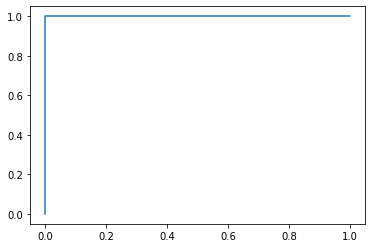

In [ ]:
from sklearn.metrics import roc_curve

fpr,tpr,th = roc_curve(roc_data[0],roc_data[1])

plt.plot(fpr,tpr)
plt.show()

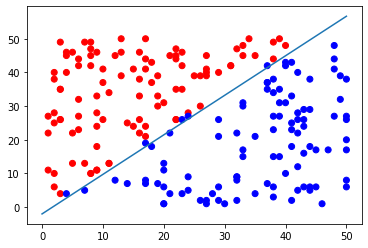

In [ ]:
c = ["r" if i[2] == 1 else "b" for i in np.array(datafile1)]
x1 = np.linspace(0,50,100)
x2 = -(w0[0]+w[0]*x1)/w[1]
plt.scatter(np.array(datafile1[0]) , np.array(datafile1[1]) ,c=c )
plt.plot(x1,x2)
plt.show()

**Data 2**

In [ ]:
datafile2

,0,1,2,3
0,69,16,54,1
1,59,18,79,1
2,89,1,81,1
3,84,14,20,1
4,92,48,73,1
...,...,...,...,...
195,48,49,53,-1
196,40,93,63,-1
197,67,99,40,-1
198,60,80,90,-1


In [ ]:
datafile2.insert(0,"x0",1)

In [ ]:
datafile2

,x0,0,1,2,3
0,1,69,16,54,1
1,1,59,18,79,1
2,1,89,1,81,1
3,1,84,14,20,1
4,1,92,48,73,1
...,...,...,...,...,...
195,1,48,49,53,-1
196,1,40,93,63,-1
197,1,67,99,40,-1
198,1,60,80,90,-1


In [ ]:
datafile2[3]=datafile2[3].replace(-1,0)

In [ ]:
datafile2

,x0,0,1,2,3
0,1,69,16,54,1
1,1,59,18,79,1
2,1,89,1,81,1
3,1,84,14,20,1
4,1,92,48,73,1
...,...,...,...,...,...
195,1,48,49,53,0
196,1,40,93,63,0
197,1,67,99,40,0
198,1,60,80,90,0


In [ ]:
data2 = np.array(datafile2)
np.random.shuffle(data2)

In [ ]:
alpha_data = [[],[]]
for a in [0.000001,0.00001,0.00005,0.0001,0.0005,0.001,0.005,0.01,0.05,0.1,0.5,1,2,3,4]:
  w = np.random.random(len(data2[0])-1)
  for i in range(10):
    np.random.shuffle(data2)
    training_data = data2[:int(0.8*len(data2))]
    
    for i in range(len(training_data)):
      #print(np.inner(w,training_data[i][:-1]))
      try:
        f = 1 / ( 1+ np.exp(-(np.inner(w,training_data[i][:-1]))))
      
        delta = a * ( training_data[i][-1] - f ) * training_data[i][:-1]
        w += delta
      except:
        print("Excepted")

  cost_fn = 0
  validation_data = data2[int(0.8*len(data2)):]
  for i in range(len(validation_data)):
    f = 1 / ( 1+ np.exp(-(np.inner(w,validation_data[i][:-1]))) )
    y = validation_data[i][-1]
    if y:
      cost_fn -= y * np.log(f)
    else:
      cost_fn -= (1-y) * np.log(1-f)
  
  alpha_data[0].append(a)
  alpha_data[1].append(cost_fn)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in exp
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp


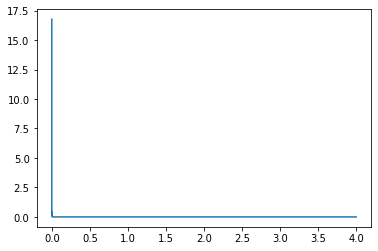

In [ ]:
plt.plot(alpha_data[0],alpha_data[1])
plt.show()

In [ ]:

a = 1
w = np.random.random(len(data2[0])-1)
training = data2[:int(0.8*len(data2))]
while(1):


  np.random.shuffle(training)
  training_data = training[:int(0.6*len(training))]
  validation_data = training[int(0.6*len(training)):]


  for i in range(len(training_data)):
    f = 1 / ( 1+ np.exp(-(np.inner(w,training_data[i][:-1]))) )
   
    delta = a * ( training_data[i][-1] - f ) * training_data[i][:-1]
    w += delta

  try:
    cost_fn_old = cost_fn 
  except:
    cost_fn_old = 1
  cost_fn = 0
  for i in range(len(validation_data)):
    f = 1 / ( 1+ np.exp(-(np.inner(w,validation_data[i][:-1]))) )
    y = validation_data[i][-1]
    if y:
      cost_fn -= y * np.log(f)
    else:
      cost_fn -= (1-y) * np.log(1-f)

  print("cost_fn",cost_fn)
  if abs(cost_fn_old-cost_fn) < 0.000001:
    break 

cost_fn inf
cost_fn inf
cost_fn inf
cost_fn 378.8957158046338
cost_fn 378.8957158046338


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: overflow encountered in exp
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in double_scalars


In [ ]:
print(w)

[   1.80422313   81.90499825 -327.67868439  186.26120185]


In [ ]:
testing_data = data2[int(0.8*len(data2)):]
TP = 0
FP = 0
TN = 0
FN = 0
roc_data = [[],[]]
for i in range(len(testing_data)):
  y = np.inner(w,testing_data[i][:-1])
  roc_data[0].append(testing_data[i][-1])
  roc_data[1].append(1 / ( 1+ np.exp(-y)))
  if y>=0 and testing_data[i][-1]==1:
    TP += 1
  elif y>=0 and testing_data[i][-1]==0:
    FP += 1
  elif y<0 and testing_data[i][-1]==1:
    FN += 1
  elif y<0 and testing_data[i][-1]==0:
    TN += 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
print(TP,FP,TN,FN)

15 0 25 0


In [ ]:
Sensitivity = TP/(TP+FN)
print(f"Sensitivity is {Sensitivity}")

Specificity = TN/(TN+FP)
print(f"Specificity is {Specificity}")

Precision = TP/(TP+FP)
print(f"Precision is {Precision}")

F_score = (2*Precision*Sensitivity)/(Precision+Sensitivity)
print(f"F-score is {F_score}")

Sensitivity is 1.0
Specificity is 1.0
Precision is 1.0
F-score is 1.0


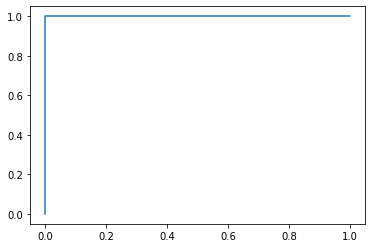

In [ ]:
from sklearn.metrics import roc_curve

fpr,tpr,th = roc_curve(roc_data[0],roc_data[1])

plt.plot(fpr,tpr)
plt.show()

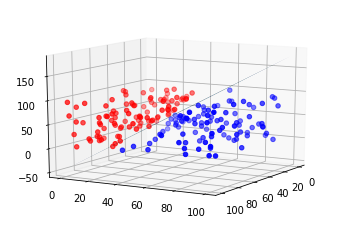

In [ ]:
c = ["r" if i[4] == 1 else "b" for i in np.array(datafile2)]
x1 = np.linspace(0,100,100)
x2 = np.linspace(0,100,100)
X1,X2 = np.meshgrid(x1,x2)
X3 = -(w[0]+w[1]*X1+w[2]*X2)/w[3]
ax=plt.figure().gca(projection="3d")
ax.scatter3D(np.array(datafile2[0]) , np.array(datafile2[1]) ,np.array(datafile2[2]),c=c )
ax.plot_surface(X1,X2,X3)
ax.view_init(13,30)
plt.show()

In [ ]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
c = ["r" if i[4] == 1 else "b" for i in np.array(datafile2)]
ax=plt.figure().gca(projection="3d")
ax.scatter3D(np.array(datafile2[0]) , np.array(datafile2[1]) ,np.array(datafile2[2]),c=c )
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.


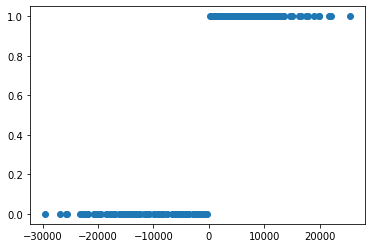

In [ ]:
data_for_plot = [[],[]]
for i in range(len(data2)):
  t = np.inner(w,data2[i][:-1])
  f = 1 / ( 1+ np.exp(-t) )
  data_for_plot[0].append(t)
  data_for_plot[1].append(f)
plt.scatter(data_for_plot[0],data_for_plot[1])
plt.show()

**LDA on DATA 2**

In [ ]:
datafile2 = pd.read_csv("/content/drive/MyDrive/Data_Mining_Assignment_03/data2.csv",header=None)

In [ ]:
datafile2[3]=datafile2[3].replace(-1,0)

In [ ]:
datafile2

,0,1,2,3
0,69,16,54,1
1,59,18,79,1
2,89,1,81,1
3,84,14,20,1
4,92,48,73,1
...,...,...,...,...
195,48,49,53,0
196,40,93,63,0
197,67,99,40,0
198,60,80,90,0


In [ ]:
x = dict(datafile2[3].value_counts())

In [ ]:
print(x)

{1: 100, 0: 100}


In [ ]:
pi_1 = x[1] / x[0] + x[1]
pi_0 = x[0] / x[0] + x[1]

In [ ]:
dataf2 = np.array(datafile2)
np.random.shuffle(dataf2)
data2 = dataf2[:int(0.7*len(dataf2))]

In [ ]:
n = len(data2[0])-1
u1 = np.zeros(n)
u0 = np.zeros(n)
for i in range(len(data2)):
  if data2[i][-1] == 1:
    u1 += data2[i][:-1]
  else:
    u0 += data2[i][:-1]
u1 = u1 / x[1]
u0 = u0 / x[0]
print(u1)
print(u0)



[40.34 15.92 42.58]
[30.18 46.7  30.07]


In [ ]:
E1 = np.zeros((n,n))
E0 = np.zeros((n,n))
for i in range(len(data2)):
  if data2[i][-1] == 1:
    k = data2[i][:-1] - u1
    E1 += k.reshape(-1,1) * k 
  else:
    k = data2[i][:-1] - u0
    E0 += k.reshape(-1,1) * k
E1 = E1 / (x[1] -1 )
E0 = E0 / (x[0] -1 )

In [ ]:
print(E1)
print(E0)

[[893.70678788  82.35692929  50.96933333]
 [ 82.35692929 159.27240404 130.27709091]
 [ 50.96933333 130.27709091 681.74412121]]
[[643.06856566 285.11333333  80.86224242]
 [285.11333333 609.3969697  299.21242424]
 [ 80.86224242 299.21242424 578.97336364]]


In [ ]:
E = (x[1]-1)*E1 + (x[0]-1)*E0 
E = E / (x[1]+x[0]-2)
print(E)

[[768.38767677 183.73513131  65.91578788]
 [183.73513131 384.33468687 214.74475758]
 [ 65.91578788 214.74475758 630.35874242]]


In [ ]:
w = np.matmul(np.linalg.inv(E) , (u1-u0).reshape(-1,1))

In [ ]:
print(w)

[[ 0.03984859]
 [-0.13326337]
 [ 0.06107785]]


In [ ]:
w0 = -0.5 * np.matmul(np.matmul(u1,np.linalg.inv(E)), u1.reshape(-1,1) ) + 0.5 * np.matmul(np.matmul(u0,np.linalg.inv(E)), u0.reshape(-1,1) ) + np.log(pi_1/pi_0)
print(w0)

[0.54876169]


In [ ]:
w = w.reshape(1,-1)[0]

In [ ]:
testing_data = dataf2[int(0.7*len(dataf2)):]
TP = 0
FP = 0
TN = 0
FN = 0
roc_data = [[],[]]
for i in range(len(testing_data)):
  y = np.inner(w,testing_data[i][:-1]) + w0[0]
  roc_data[0].append(testing_data[i][-1])
  roc_data[1].append(1 / ( 1+ np.exp(-y)))
  if y>=0 and testing_data[i][-1]==1:
    TP += 1
  elif y>=0 and testing_data[i][-1]==0:
    FP += 1
  elif y<0 and testing_data[i][-1]==1:
    FN += 1
  elif y<0 and testing_data[i][-1]==0:
    TN += 1

In [ ]:
print(TP,FP,TN,FN)

30 0 30 0


In [ ]:
Sensitivity = TP/(TP+FN)
print(f"Sensitivity is {Sensitivity}")

Specificity = TN/(TN+FP)
print(f"Specificity is {Specificity}")

Precision = TP/(TP+FP)
print(f"Precision is {Precision}")

F_score = (2*Precision*Sensitivity)/(Precision+Sensitivity)
print(f"F-score is {F_score}")

Sensitivity is 1.0
Specificity is 1.0
Precision is 1.0
F-score is 1.0


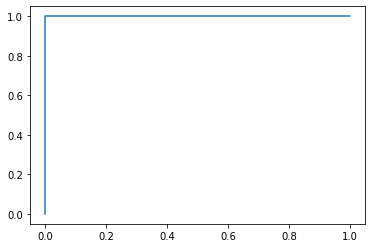

In [ ]:
from sklearn.metrics import roc_curve

fpr,tpr,th = roc_curve(roc_data[0],roc_data[1])

plt.plot(fpr,tpr)
plt.show()

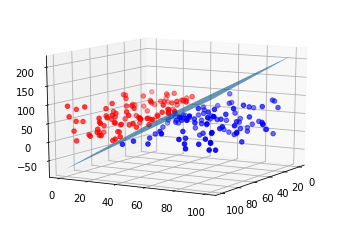

In [ ]:
c = ["r" if i[3] == 1 else "b" for i in np.array(datafile2)]
x1 = np.linspace(0,100,100)
x2 = np.linspace(0,100,100)
X1,X2 = np.meshgrid(x1,x2)
X3 = -(w0+w[0]*X1+w[1]*X2)/w[2]
ax=plt.figure().gca(projection="3d")
ax.scatter3D(np.array(datafile2[0]) , np.array(datafile2[1]) ,np.array(datafile2[2]),c=c )
ax.plot_surface(X1,X2,X3)
ax.view_init(13,30)
plt.show()

**Data 3**

In [ ]:
datafile3

,0,1,2
0,-0.69736,-3.6535,1
1,-4.82200,-7.6336,1
2,-8.23430,-7.5536,1
3,-6.07640,-11.3800,1
4,-10.73600,-14.3760,1
...,...,...,...
195,8.22200,4.8614,0
196,11.64300,5.3394,0
197,8.16510,10.1410,0
198,14.25700,9.0196,0


In [ ]:
datafile3.insert(0,"x0",1)

In [ ]:
datafile3

,x0,0,1,2
0,1,-0.69736,-3.6535,1
1,1,-4.82200,-7.6336,1
2,1,-8.23430,-7.5536,1
3,1,-6.07640,-11.3800,1
4,1,-10.73600,-14.3760,1
...,...,...,...,...
195,1,8.22200,4.8614,0
196,1,11.64300,5.3394,0
197,1,8.16510,10.1410,0
198,1,14.25700,9.0196,0


In [ ]:
data3 = np.array(datafile3)
np.random.shuffle(data3)

In [ ]:
alpha_data = [[],[]]
for a in [0.000001,0.00001,0.00005,0.0001,0.0005,0.001,0.005,0.01,0.05,0.1,0.5,1,2,3,4]:
  w = np.random.random(len(data3[0])-1)
  for i in range(10):
    np.random.shuffle(data3)
    training_data = data3[:int(0.8*len(data3))]
    
    for i in range(len(training_data)):
      #print(np.inner(w,training_data[i][:-1]))
      try:
        f = 1 / ( 1+ np.exp(-(np.inner(w,training_data[i][:-1]))))
      
        delta = a * ( training_data[i][-1] - f ) * training_data[i][:-1]
        w += delta
      except:
        print("Excepted")

  cost_fn = 0
  validation_data = data3[int(0.8*len(data3)):]
  for i in range(len(validation_data)):
    f = 1 / ( 1+ np.exp(-(np.inner(w,validation_data[i][:-1]))) )
    y = validation_data[i][-1]
    if y:
      cost_fn -= y * np.log(f)
    else:
      cost_fn -= (1-y) * np.log(1-f)
  
  alpha_data[0].append(a)
  alpha_data[1].append(cost_fn)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in exp
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp


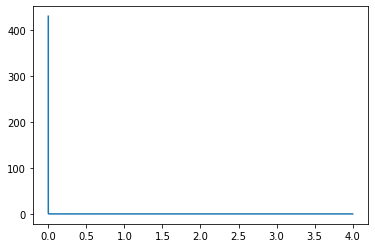

In [ ]:
plt.plot(alpha_data[0],alpha_data[1])
plt.show()

In [ ]:

a = 1
w = np.random.random(len(data3[0])-1)
training = data3[:int(0.8*len(data3))]
while(1):


  np.random.shuffle(training)
  training_data = training[:int(0.6*len(training))]
  validation_data = training[int(0.6*len(training)):]


  for i in range(len(training_data)):
    f = 1 / ( 1+ np.exp(-(np.inner(w,training_data[i][:-1]))) )
   
    delta = a * ( training_data[i][-1] - f ) * training_data[i][:-1]
    w += delta

  try:
    cost_fn_old = cost_fn 
  except:
    cost_fn_old = 1
  cost_fn = 0
  for i in range(len(validation_data)):
    f = 1 / ( 1+ np.exp(-(np.inner(w,validation_data[i][:-1]))) )
    y = validation_data[i][-1]
    if y:
      cost_fn -= y * np.log(f)
    else:
      cost_fn -= (1-y) * np.log(1-f)

  print("cost_fn",cost_fn)
  if cost_fn == 0:
    break 

Streaming output truncated to the last 5000 lines.
cost_fn 3.250955976397932e-05
cost_fn 8.371081605829139e-11
cost_fn 3.242158077088726e-05
cost_fn 3.242152990137686e-05
cost_fn 4.998623737276247e-11
cost_fn 3.240593020385887e-05
cost_fn 3.2449475424299566e-05
cost_fn 1.1203005190459266e-10
cost_fn 1.1596512207248214e-07
cost_fn 7.243396089180086e-08
cost_fn 3.243162613959154e-05
cost_fn 3.243157310896787e-05
cost_fn 7.238410921309793e-08
cost_fn 1.1597464312185999e-07
cost_fn 7.238097571892879e-08
cost_fn 3.238500633566043e-05
cost_fn 3.23850755642411e-05
cost_fn 3.242854465440365e-05
cost_fn 3.2312717293491176e-05
cost_fn 1.1596185135337792e-07
cost_fn 4.359868672069623e-08
cost_fn 7.241414252049435e-08
cost_fn 7.237566030272772e-08
cost_fn 3.2250889112648595e-05
cost_fn 3.2250926368205186e-05
cost_fn 3.3493541274098743e-11
cost_fn 3.2278970958810774e-05
cost_fn 3.23512086066204e-05
cost_fn 3.23512532015023e-05
cost_fn 4.355340449804109e-08
cost_fn 7.230608850886944e-08
cost_fn 1.06

In [ ]:
print(w)

[ 0.01022398 -4.62877773 -2.1873702 ]


In [ ]:
testing_data = data3[int(0.8*len(data3)):]
TP = 0
FP = 0
TN = 0
FN = 0
roc_data = [[],[]]
for i in range(len(testing_data)):
  y = np.inner(w,testing_data[i][:-1])
  roc_data[0].append(testing_data[i][-1])
  roc_data[1].append(1 / ( 1+ np.exp(-y)))
  if y>=0 and testing_data[i][-1]==1:
    TP += 1
  elif y>=0 and testing_data[i][-1]==0:
    FP += 1
  elif y<0 and testing_data[i][-1]==1:
    FN += 1
  elif y<0 and testing_data[i][-1]==0:
    TN += 1

In [ ]:
print(TP,FP,TN,FN)

19 0 21 0


In [ ]:
Sensitivity = TP/(TP+FN)
print(f"Sensitivity is {Sensitivity}")

Specificity = TN/(TN+FP)
print(f"Specificity is {Specificity}")

Precision = TP/(TP+FP)
print(f"Precision is {Precision}")

F_score = (2*Precision*Sensitivity)/(Precision+Sensitivity)
print(f"F-score is {F_score}")

Sensitivity is 1.0
Specificity is 1.0
Precision is 1.0
F-score is 1.0


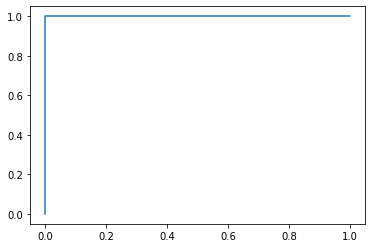

In [ ]:
from sklearn.metrics import roc_curve

fpr,tpr,th = roc_curve(roc_data[0],roc_data[1])

plt.plot(fpr,tpr)
plt.show()

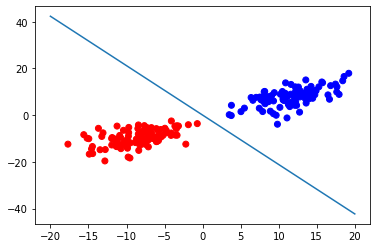

In [ ]:
c = ["r" if i[3] == 1 else "b" for i in np.array(datafile3)]
x1 = np.linspace(-20,20,100)
x2 = -(w[0]+w[1]*x1)/w[2]
ax=plt.figure().gca()
ax.scatter(np.array(datafile3[0]) , np.array(datafile3[1]),c=c )
ax.plot(x1,x2)
plt.show()

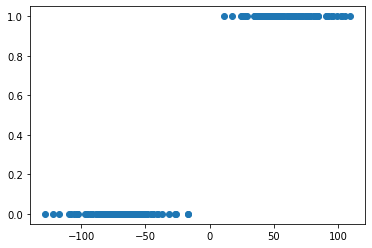

In [ ]:
data_for_plot = [[],[]]
for i in range(len(data3)):
  t = np.inner(w,data3[i][:-1])
  f = 1 / ( 1+ np.exp(-t) )
  data_for_plot[0].append(t)
  data_for_plot[1].append(f)
plt.scatter(data_for_plot[0],data_for_plot[1])
plt.show()

**LDA on DATA 3**

In [ ]:
datafile3 = pd.read_csv("/content/drive/MyDrive/Data_Mining_Assignment_03/data3.csv",header=None)

In [ ]:
datafile3

,0,1,2
0,-0.69736,-3.6535,1
1,-4.82200,-7.6336,1
2,-8.23430,-7.5536,1
3,-6.07640,-11.3800,1
4,-10.73600,-14.3760,1
...,...,...,...
195,8.22200,4.8614,0
196,11.64300,5.3394,0
197,8.16510,10.1410,0
198,14.25700,9.0196,0


In [ ]:
x = dict(datafile3[2].value_counts())

In [ ]:
print(x)

{1: 100, 0: 100}


In [ ]:
pi_1 = x[1] / x[0] + x[1]
pi_0 = x[0] / x[0] + x[1]

In [ ]:
dataf3 = np.array(datafile3)
np.random.shuffle(dataf3)
data3 = dataf3[:int(0.7*len(dataf3))]

In [ ]:
n = len(data3[0])-1
u1 = np.zeros(n)
u0 = np.zeros(n)
for i in range(len(data3)):
  if data3[i][-1] == 1:
    u1 += data3[i][:-1]
  else:
    u0 += data3[i][:-1]
u1 = u1 / x[1]
u0 = u0 / x[0]
print(u1)
print(u0)



[-6.347511 -6.608667]
[8.555408   5.78061104]


In [ ]:
E1 = np.zeros((n,n))
E0 = np.zeros((n,n))
for i in range(len(data3)):
  if data3[i][-1] == 1:
    k = data3[i][:-1] - u1
    E1 += k.reshape(-1,1) * k 
  else:
    k = data3[i][:-1] - u0
    E0 += k.reshape(-1,1) * k
E1 = E1 / (x[1] -1 )
E0 = E0 / (x[0] -1 )

In [ ]:
print(E1)
print(E0)

[[13.71130296  9.98243407]
 [ 9.98243407 14.13518568]]
[[16.57534396 11.49620701]
 [11.49620701 15.88765886]]


In [ ]:
E = (x[1]-1)*E1 + (x[0]-1)*E0 
E = E / (x[1]+x[0]-2)
print(E)

[[15.14332346 10.73932054]
 [10.73932054 15.01142227]]


In [ ]:
w = np.matmul(np.linalg.inv(E) , (u1-u0).reshape(-1,1))

In [ ]:
print(w)

[[-0.80955201]
 [-0.24616185]]


In [ ]:
w0 = -0.5 * np.matmul(np.matmul(u1,np.linalg.inv(E)), u1.reshape(-1,1) ) + 0.5 * np.matmul(np.matmul(u0,np.linalg.inv(E)), u0.reshape(-1,1) ) + np.log(pi_1/pi_0)
print(w0)

[0.79178584]


In [ ]:
w = w.reshape(1,-1)[0]

In [ ]:
testing_data = dataf3[int(0.7*len(dataf3)):]
TP = 0
FP = 0
TN = 0
FN = 0
roc_data = [[],[]]
for i in range(len(testing_data)):
  y = np.inner(w,testing_data[i][:-1]) + w0[0]
  roc_data[0].append(testing_data[i][-1])
  roc_data[1].append(1 / ( 1+ np.exp(-y)))
  if y>=0 and testing_data[i][-1]==1:
    TP += 1
  elif y>=0 and testing_data[i][-1]==0:
    FP += 1
  elif y<0 and testing_data[i][-1]==1:
    FN += 1
  elif y<0 and testing_data[i][-1]==0:
    TN += 1

In [ ]:
print(TP,FP,TN,FN)

34 0 26 0


In [ ]:
Sensitivity = TP/(TP+FN)
print(f"Sensitivity is {Sensitivity}")

Specificity = TN/(TN+FP)
print(f"Specificity is {Specificity}")

Precision = TP/(TP+FP)
print(f"Precision is {Precision}")

F_score = (2*Precision*Sensitivity)/(Precision+Sensitivity)
print(f"F-score is {F_score}")

Sensitivity is 1.0
Specificity is 1.0
Precision is 1.0
F-score is 1.0


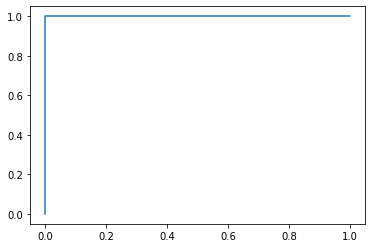

In [ ]:
from sklearn.metrics import roc_curve

fpr,tpr,th = roc_curve(roc_data[0],roc_data[1])

plt.plot(fpr,tpr)
plt.show()

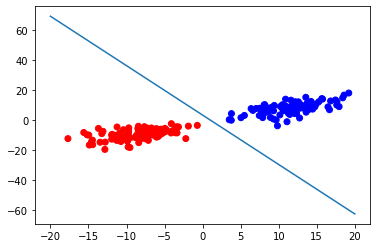

In [ ]:
c = ["r" if i[2] == 1 else "b" for i in np.array(datafile3)]
x1 = np.linspace(-20,20,100)
x2 = -(w0+w[0]*x1)/w[1]
ax=plt.figure().gca()
ax.scatter(np.array(datafile3[0]) , np.array(datafile3[1]),c=c )
ax.plot(x1,x2)
plt.show()

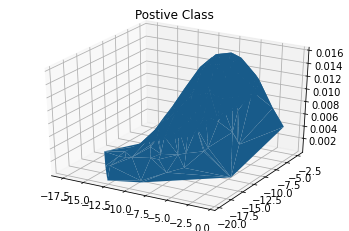

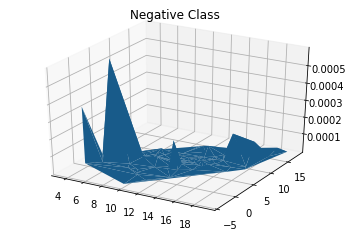

In [ ]:
from scipy.stats import multivariate_normal
x = [i[:-1] for i in dataf3 if i[-1] == 1 ]
y = [i[:-1] for i in dataf3 if i[-1] == 0 ]
ax = plt.figure().gca(projection="3d")
X1,X2 = ([i[0] for i in x],[i[1] for i in x])
X3 = multivariate_normal.pdf(x,u1,E1)
ax.plot_trisurf(X1,X2,X3)
ax.set_title("Postive Class")
plt.show()

ax = plt.figure().gca(projection="3d")
Y1,Y2 = ([i[0] for i in y],[i[1] for i in y])
Y3 = multivariate_normal.pdf(x,u0,E0)
ax.plot_trisurf(Y1,Y2,Y3)
ax.set_title("Negative Class")

plt.show()

**Data 4**

In [ ]:
datafile4

,0,1,2
0,12,26,1
1,13,30,1
2,14,31,1
3,14,32,1
4,15,18,1
...,...,...,...
145,12,9,0
146,12,10,0
147,12,16,0
148,13,8,0


In [ ]:
datafile4.insert(0,"x0",1)

In [ ]:
datafile4

,x0,0,1,2
0,1,12,26,1
1,1,13,30,1
2,1,14,31,1
3,1,14,32,1
4,1,15,18,1
...,...,...,...,...
145,1,12,9,0
146,1,12,10,0
147,1,12,16,0
148,1,13,8,0


In [ ]:
data4 = np.array(datafile4)
np.random.shuffle(data4)

In [ ]:
alpha_data = [[],[]]
for a in [0.000001,0.00001,0.00005,0.0001,0.0005,0.001,0.005,0.01,0.05,0.1,0.5,1,2,3,4]:
  w = np.random.random(len(data4[0])-1)
  for i in range(10):
    np.random.shuffle(data4)
    training_data = data4[:int(0.8*len(data4))]
    
    for i in range(len(training_data)):
      #print(np.inner(w,training_data[i][:-1]))
      try:
        f = 1 / ( 1+ np.exp(-(np.inner(w,training_data[i][:-1]))))
      
        delta = a * ( training_data[i][-1] - f ) * training_data[i][:-1]
        w += delta
      except:
        print("Excepted")

  cost_fn = 0
  validation_data = data4[int(0.8*len(data4)):]
  for i in range(len(validation_data)):
    f = 1 / ( 1+ np.exp(-(np.inner(w,validation_data[i][:-1]))) )
    y = validation_data[i][-1]
    if y:
      cost_fn -= y * np.log(f)
    else:
      cost_fn -= (1-y) * np.log(1-f)
  
  alpha_data[0].append(a)
  alpha_data[1].append(cost_fn)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in exp
  # This is added back by InteractiveShellApp.init_path()


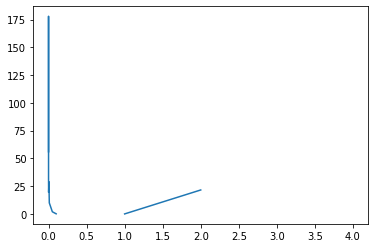

In [ ]:
plt.plot(alpha_data[0],alpha_data[1])
plt.show()

In [ ]:

a = 1
w = np.random.random(len(data4[0])-1)
training = data4[:int(0.8*len(data4))]
while(1):


  np.random.shuffle(training)
  training_data = training[:int(0.6*len(training))]
  validation_data = training[int(0.6*len(training)):]


  for i in range(len(training_data)):
    f = 1 / ( 1+ np.exp(-(np.inner(w,training_data[i][:-1]))) )
   
    delta = a * ( training_data[i][-1] - f ) * training_data[i][:-1]
    w += delta

  try:
    cost_fn_old = cost_fn 
  except:
    cost_fn_old = 1
  cost_fn = 0
  for i in range(len(validation_data)):
    f = 1 / ( 1+ np.exp(-(np.inner(w,validation_data[i][:-1]))) )
    y = validation_data[i][-1]
    if y:
      cost_fn -= y * np.log(f)
    else:
      cost_fn -= (1-y) * np.log(1-f)

  print("cost_fn",cost_fn)
  if abs(cost_fn_old-cost_fn) < 0.000001:
    break 

cost_fn inf
cost_fn 11367.308280834295
cost_fn 9477.350100639302
cost_fn inf
cost_fn 11167.298293872786
cost_fn 9749.44428786769
cost_fn inf
cost_fn inf
cost_fn 10.929705895475934
cost_fn inf
cost_fn 15.34653515221848
cost_fn inf
cost_fn 31.69219715373204
cost_fn 8059.186533831403
cost_fn 11.23843248486586
cost_fn inf
cost_fn 4519.566414020831
cost_fn inf
cost_fn 1.1659562204620192e-12
cost_fn inf
cost_fn inf
cost_fn 0.02285880530603801
cost_fn 0.022858805395797155


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in double_scalars


In [ ]:
print(w)

[-183.31934645    4.54795052    7.81106078]


In [ ]:
testing_data = data4[int(0.8*len(data4)):]
TP = 0
FP = 0
TN = 0
FN = 0
roc_data = [[],[]]
for i in range(len(testing_data)):
  y = np.inner(w,testing_data[i][:-1])
  roc_data[0].append(testing_data[i][-1])
  roc_data[1].append( 1 / ( 1+ np.exp(-y)) )
  if y>=0 and testing_data[i][-1]==1:
    TP += 1
  elif y>=0 and testing_data[i][-1]==0:
    FP += 1
  elif y<0 and testing_data[i][-1]==1:
    FN += 1
  elif y<0 and testing_data[i][-1]==0:
    TN += 1

In [ ]:
print(TP,FP,TN,FN)

20 0 10 0


In [ ]:
Sensitivity = TP/(TP+FN)
print(f"Sensitivity is {Sensitivity}")

Specificity = TN/(TN+FP)
print(f"Specificity is {Specificity}")

Precision = TP/(TP+FP)
print(f"Precision is {Precision}")

F_score = (2*Precision*Sensitivity)/(Precision+Sensitivity)
print(f"F-score is {F_score}")

Sensitivity is 1.0
Specificity is 1.0
Precision is 1.0
F-score is 1.0


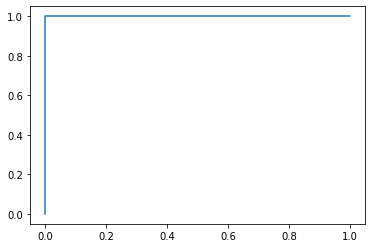

In [ ]:
from sklearn.metrics import roc_curve

fpr,tpr,th = roc_curve(roc_data[0],roc_data[1])

plt.plot(fpr,tpr)
plt.show()

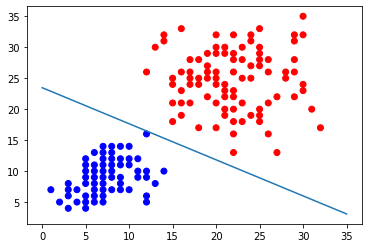

In [ ]:
c = ["r" if i[3] == 1 else "b" for i in np.array(datafile4)]
x1 = np.linspace(0,35,100)
x2 = -(w[0]+w[1]*x1)/w[2]
plt.scatter(np.array(datafile4[0]) , np.array(datafile4[1]) ,c=c )
plt.plot(x1,x2)
plt.show()

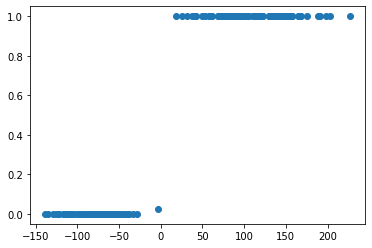

In [ ]:
data_for_plot = [[],[]]
for i in range(len(data4)):
  t = np.inner(w,data4[i][:-1])
  f = 1 / ( 1+ np.exp(-t) )
  data_for_plot[0].append(t)
  data_for_plot[1].append(f)
plt.scatter(data_for_plot[0],data_for_plot[1])
plt.show()

**LDA on DATA 4**

In [ ]:
datafile4 = pd.read_csv("/content/drive/MyDrive/Data_Mining_Assignment_03/data4.csv",header=None)

In [ ]:
datafile4

,0,1,2
0,12,26,1
1,13,30,1
2,14,31,1
3,14,32,1
4,15,18,1
...,...,...,...
145,12,9,0
146,12,10,0
147,12,16,0
148,13,8,0


In [ ]:
x = dict(datafile4[2].value_counts())

In [ ]:
pi_1 = x[1] / x[0] + x[1]
pi_0 = x[0] / x[0] + x[1]

In [ ]:
dataf4 = np.array(datafile4)
np.random.shuffle(dataf4)
data4 = dataf4[:int(0.7*len(dataf4))]

In [ ]:
n = len(data4[0])-1
u1 = np.zeros(n)
u0 = np.zeros(n)
for i in range(len(data4)):
  if data4[i][-1] == 1:
    u1 += data4[i][:-1]
  else:
    u0 += data4[i][:-1]
u1 = u1 / x[1]
u0 = u0 / x[0]
print(u1)
print(u0)



[16.13483146 18.12359551]
[4.37704918 5.96721311]


In [ ]:
E1 = np.zeros((n,n))
E0 = np.zeros((n,n))
for i in range(len(data4)):
  if data4[i][-1] == 1:
    k = data4[i][:-1] - u1
    E1 += k.reshape(-1,1) * k 
  else:
    k = data4[i][:-1] - u0
    E0 += k.reshape(-1,1) * k
E1 = E1 / (x[1] -1 )
E0 = E0 / (x[0] -1 )

In [ ]:
print(E1)
print(E0)

[[40.75827203 25.64579771]
 [25.64579771 49.26081848]]
[[ 9.31399265  7.76901371]
 [ 7.76901371 13.04277524]]


In [ ]:
E = (x[1]-1)*E1 + (x[0]-1)*E0 
E = E / (x[1]+x[0]-2)
print(E)

[[28.0105912  18.39845284]
 [18.39845284 34.57782798]]


In [ ]:
w = np.matmul(np.linalg.inv(E) , (u1-u0).reshape(-1,1))

In [ ]:
print(w)

[[0.29029786]
 [0.19710176]]


In [ ]:
w0 = -0.5 * np.matmul(np.matmul(u1,np.linalg.inv(E)), u1.reshape(-1,1) ) + 0.5 * np.matmul(np.matmul(u0,np.linalg.inv(E)), u0.reshape(-1,1) ) + np.log(pi_1/pi_0)
print(w0)

[-5.34636077]


In [ ]:
w = w.reshape(1,-1)[0]

In [ ]:
testing_data = dataf4[int(0.7*len(dataf4)):]
TP = 0
FP = 0
TN = 0
FN = 0
roc_data = [[],[]]
for i in range(len(testing_data)):
  y = np.inner(w,testing_data[i][:-1]) + w0[0]
  roc_data[0].append(testing_data[i][-1])
  roc_data[1].append(1 / ( 1+ np.exp(-y)))
  if y>=0 and testing_data[i][-1]==1:
    TP += 1
  elif y>=0 and testing_data[i][-1]==0:
    FP += 1
  elif y<0 and testing_data[i][-1]==1:
    FN += 1
  elif y<0 and testing_data[i][-1]==0:
    TN += 1

In [ ]:
print(TP,FP,TN,FN)

23 5 17 0


In [ ]:
Sensitivity = TP/(TP+FN)
print(f"Sensitivity is {Sensitivity}")

Specificity = TN/(TN+FP)
print(f"Specificity is {Specificity}")

Precision = TP/(TP+FP)
print(f"Precision is {Precision}")

F_score = (2*Precision*Sensitivity)/(Precision+Sensitivity)
print(f"F-score is {F_score}")

Sensitivity is 1.0
Specificity is 0.7727272727272727
Precision is 0.8214285714285714
F-score is 0.9019607843137255


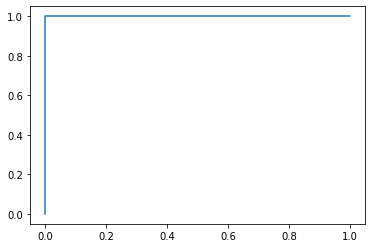

In [ ]:
from sklearn.metrics import roc_curve

fpr,tpr,th = roc_curve(roc_data[0],roc_data[1])

plt.plot(fpr,tpr)
plt.show()

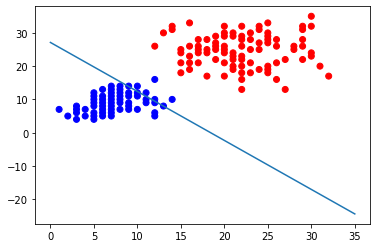

In [ ]:
c = ["r" if i[2] == 1 else "b" for i in np.array(datafile4)]
x1 = np.linspace(0,35,100)
x2 = -(w0+w[0]*x1)/w[1]
plt.scatter(np.array(datafile4[0]) , np.array(datafile4[1]) ,c=c )
plt.plot(x1,x2)
plt.show()

#2. Generate outputs using the logistic function found  out in the previous question for Data 1, that is find the output using log(f(x)/(1-f(x)) and then apply linear regression on the resulting supervised data.
(a) Plot the decision boundary.

(b) Report mean square error.

(c) Compare the parameters obtained in this method with that generated in
previous question using logistic regression.

In [ ]:
datafile1 = pd.read_csv("/content/drive/MyDrive/Data_Mining_Assignment_03/data1.csv",header=None)

In [ ]:
datafile1

,0,1,2
0,6,32,1
1,26,39,1
2,2,38,1
3,25,39,1
4,3,35,1
...,...,...,...
195,47,17,-1
196,24,27,-1
197,18,18,-1
198,19,7,-1


In [ ]:

datafile1[0] = (np.array(datafile1[0]) - np.mean(datafile1[0])) / np.std(datafile1[0])

datafile1[1] = (np.array(datafile1[1]) - np.mean(datafile1[1])) / np.std(datafile1[1])

In [ ]:
datafile1

,0,1,2
0,-1.306664,0.368038,1
1,0.061929,0.837731,1
2,-1.580382,0.770632,1
3,-0.006501,0.837731,1
4,-1.511952,0.569335,1
...,...,...,...
195,1.498951,-0.638447,-1
196,-0.074930,0.032543,-1
197,-0.485508,-0.571348,-1
198,-0.417079,-1.309437,-1


In [ ]:
datafile1.insert(0,"x0",1)

In [ ]:
data1 = np.array(datafile1)
np.random.shuffle(data1)

In [ ]:
w = [-12.22234951 , -92.50411888 , 81.94390348]

In [ ]:
f= []
for i in range(len(data1)):
  j = (np.inner(w,data1[i][:-1]))
  k = 1 / ( 1+ np.exp(-j,dtype=np.longdouble))
  f.append(k)
  if k == 1.0:
    print(k,j)
  
f = np.array(f)
y = np.log(f/(1-f),dtype=np.longdouble)



1.0 77.35605940922837
1.0 89.32269780694207
1.0 95.0061012988521
1.0 97.82440958585454
1.0 56.70266119069996
1.0 55.87099481699893
1.0 196.7948076859944
1.0 49.86428215918953
1.0 120.00287942778789
1.0 174.2930286781617
1.0 109.00616852777233
1.0 142.1345623518161
1.0 75.83098778582345
1.0 174.2930286781617
1.0 108.49781131997071
1.0 124.80782962809177
1.0 125.63949600179279
1.0 115.47445147547826
1.0 54.992541525392795
1.0 195.45478410449178
1.0 118.66285584628523
1.0 131.3228994937028
1.0 47.692592203985846
1.0 86.18108035404023
1.0 172.30638676486026
1.0 49.67923411728727
1.0 168.14805489635518
1.0 208.11482775190936
1.0 162.9730086122468
1.0 222.1148949808296
1.0 90.1543641806431
1.0 44.689235875081145
1.0 45.520902248782164
1.0 80.49767686213022
1.0 193.79145135708973
1.0 125.31618683589339
1.0 90.33941222254535
1.0 208.62318495971098
1.0 140.9795868122157
1.0 108.17450215407133
1.0 228.4449168045384
1.0 204.78816225710526
1.0 152.48465492003288
1.0 135.15792219630853
1.0 115.3361

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
f

array([1.00000000e+000, 8.02300702e-002, 1.00000000e+000, 1.00000000e+000,
       1.00000000e+000, 4.47527895e-047, 1.00000000e+000, 7.30642131e-007,
       1.00000000e+000, 1.00000000e+000, 1.49799762e-033, 1.00000000e+000,
       9.36376467e-001, 5.65049760e-089, 1.15070341e-007, 4.51058132e-052,
       2.42025075e-073, 9.94425892e-001, 7.68446204e-002, 1.00000000e+000,
       5.13632805e-041, 3.75042576e-058, 1.90723195e-086, 1.00000000e+000,
       1.00000000e+000, 2.67957867e-108, 1.00000000e+000, 1.00000000e+000,
       1.00000000e+000, 2.83880060e-034, 1.00000000e+000, 7.62162297e-068,
       1.00000000e+000, 9.02688811e-001, 1.00000000e+000, 1.00000000e+000,
       4.87036204e-054, 1.00000000e+000, 4.46868674e-029, 1.00000000e+000,
       1.42753414e-001, 9.89412266e-001, 1.96259641e-046, 1.00000000e+000,
       1.00000000e+000, 6.75924812e-002, 4.20619494e-043, 5.41681823e-028,
       1.00000000e+000, 4.61816811e-067, 2.23816158e-053, 9.89412266e-001,
       1.00000000e+000, 1

In [ ]:
datafile1.insert(4,4,y)

In [ ]:
datafile1

,x0,0,1,2,4
0,1,-1.306664,0.368038,1,inf
1,1,0.061929,0.837731,1,-2.439225
2,1,-1.580382,0.770632,1,inf
3,1,-0.006501,0.837731,1,inf
4,1,-1.511952,0.569335,1,inf
...,...,...,...,...,...
195,1,1.498951,-0.638447,-1,inf
196,1,-0.074930,0.032543,-1,-190.538286
197,1,-0.485508,-0.571348,-1,-52.756091
198,1,-0.417079,-1.309437,-1,-205.693329


In [ ]:
datafile1=datafile1.drop(columns=[2])
datafile1[4] = datafile1[4].replace(np.inf,10**20)
datafile1[4] = datafile1[4].replace(np.NINF,-10**20)

In [ ]:
data= np.array(datafile1,dtype=np.longdouble)

In [ ]:
alpha_data = [[],[]]
for k in [0.000001,0.00001,0.00005,0.0001,0.0005,0.001,0.005,0.01,0.05,0.1,0.5,1,2,3,4] :
  a = k
  for j in range(100):
    w = np.random.rand(3)
    np.random.shuffle(data)
    training = data[0:int(0.8*len(data))]
    validation  = data[int(0.8*len(data)):]
    for i in range(len(training)):
      diff = training[i][-1] - np.inner(w,training[i][:-1])
      delta_w =  a * ( diff ) * training[i][:-1]
      w = w + delta_w
    cost_fn = 0
  for i in range(len(validation)):
    error = validation[i][-1] - np.inner(w,validation[i][:-1])
    cost_fn += error**2
  cost_fn = 0.5*cost_fn
  alpha_data[0].append(k)
  alpha_data[1].append(cost_fn)




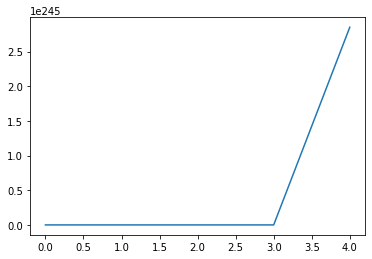

In [ ]:
plt.plot(alpha_data[0],alpha_data[1])
plt.show()

In [ ]:

np.random.shuffle(data)

training_data = data[0:int(0.6*len(data))]
validation_data = data[int(0.6*len(data)):int(0.8*len(data))]

# Initializing the random weights
w = np.random.rand(3)

a = 0.0005

cost_fn_sum = 10
cost_fn_sum_new = 100

while(abs(cost_fn_sum_new-cost_fn_sum)>0.000001):

  cost_fn_sum = cost_fn_sum_new
  cost_fn_sum_new = 0
  
  # Training
  for i in range(len(training_data)):
    diff = training_data[i][-1] - np.inner(w,training_data[i][:-1])
    delta_w =  a * ( diff ) * training_data[i][:-1]
    w = w + delta_w

  # Validation
  for i in range(len(validation_data)):
    diff = validation_data[i][-1] - np.inner(w,validation_data[i][:-1])
    cost_fn_sum_new += diff**2



  print(cost_fn_sum_new)

1.05555972573862454415e+41
1.0171022193324783323e+41
9.83893334943184516e+40
9.552856894261479668e+40
9.307085726381299661e+40
9.096590234507465411e+40
8.916939370466237332e+40
8.764230845829949468e+40
8.6350294002333849997e+40
8.5263122106887545585e+40
8.4354206185189522274e+40
8.360017445441483727e+40
8.298049254293090793e+40
8.2477129841549137323e+40
8.2074264553403067524e+40
8.175802297832512855e+40
8.1516249081828908016e+40
8.133830085376397429e+40
8.121487036424041808e+40
8.1137824780572827247e+40
8.1100065924120384216e+40
8.1095406224734097074e+40
8.111845917724948351e+40
8.116454262278516408e+40
8.12295933707988865e+40
8.1310091848808428125e+40
8.1402995617967164384e+40
8.1505680726558729267e+40
8.161588999194656919e+40
8.173168740635552311e+40
8.1851417954642603243e+40
8.197367221432080939e+40
8.209725518076104895e+40
8.2221158824799546977e+40
8.2344537946882866364e+40
8.2466688942240478733e+40
8.2587031136138463874e+40
8.2705090387703478297e+40
8.282048469570308573e+40
8.2932

In [ ]:
print(w)

[3.63733195e+19 3.38226935e+18 7.17516031e+18]


In [ ]:
# Testing
cost_fn_sum = 0
testing_set = data[int(0.8*len(data)):]
for i in range(len(testing_set)):
  diff = testing_set[i][-1] - np.inner(w,testing_set[i][:-1])
  cost_fn_sum += diff**2
cost_fn_sum = cost_fn_sum/len(testing_set)
print(cost_fn_sum)

2.4707513422823172251e+39


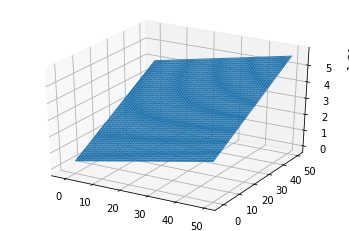

In [ ]:
ax = plt.figure().gca(projection="3d")
ax.scatter3D(np.array(datafile1[0]),np.array(datafile1[1]),np.array(datafile1[4]))
x1 = np.linspace(0,50,100)
x2 = np.linspace(0,50,100)
X1,X2 = np.meshgrid(x1,x2)
Y = w[0]+w[1]*X1+w[2]*X2
ax.plot_surface(X1,X2,Y)
plt.show()

In [ ]:
datafile1[4]

0      1.000000e+20
1     -2.439225e+00
2      1.000000e+20
3      1.000000e+20
4      1.000000e+20
           ...     
195    1.000000e+20
196   -1.905383e+02
197   -5.275609e+01
198   -2.056933e+02
199   -3.907933e+01
Name: 4, Length: 200, dtype: float128

# 7. Apply

(a) Multi class LDA on Data 5.

(b) Plot the decision boundary between classes.

(c) Report the values of the parameters.

(d) Assess the performance of the model.

In [ ]:
datafile5

,0,1,2,3
0,-6.2213,2.84320,10.54700,1
1,-14.9730,-6.42750,3.83370,1
2,-5.9850,-3.94020,11.98600,1
3,-6.8994,1.87140,11.22500,1
4,-4.8246,4.94470,17.26100,1
...,...,...,...,...
295,1.8102,-0.59976,0.63192,3
296,9.5219,13.22700,13.51400,3
297,-3.8302,-0.51635,-0.49433,3
298,-4.2867,-4.10830,-1.15490,3


In [ ]:
x = dict(datafile5[3].value_counts())
print(x)

{3: 100, 2: 100, 1: 100}


In [ ]:
pi = {1 : x[1]/(x[1]+x[2]+x[3]) , 2 : x[2]/(x[1]+x[2]+x[3]) , 3 : x[3]/(x[1]+x[2]+x[3])}

In [ ]:
dataf5 = np.array(datafile5)
np.random.shuffle(dataf5)
data5 = dataf5[:int(0.7*len(dataf5))]

In [ ]:
n = len(data5[0])-1
u1 = np.zeros(n)
u2 = np.zeros(n)
u3 = np.zeros(n)
for i in range(len(data5)):
  if data5[i][-1] == 1:
    u1 += data5[i][:-1]
  elif data5[i][-1] == 2:
    u2 += data5[i][:-1]
  elif data5[i][-1] == 3:
    u3 += data5[i][:-1]
u1 = u1 / x[1]
u2 = u2 / x[2]
u3 = u3 / x[3]
print(u1)
print(u2)
print(u3)


[-7.772863 -3.854021  8.579663]
[ 5.0457229  7.745888  -3.4217475]
[-0.34923592 -0.59081122  0.2803568 ]


In [ ]:
E1 = np.zeros((n,n))
E2 = np.zeros((n,n))
E3 = np.zeros((n,n))
for i in range(len(data5)):
  if data5[i][-1] == 1:
    k = data5[i][:-1] - u1
    E1 += k.reshape(-1,1) * k 
  elif data5[i][-1] == 2:
    k = data5[i][:-1] - u2
    E2 += k.reshape(-1,1) * k
  elif data5[i][-1] == 3:
    k = data5[i][:-1] - u3
    E3 += k.reshape(-1,1) * k
E1 = E1 / (x[1] -1 )
E2 = E2 / (x[2] -1 )
E3 = E3 / (x[3] -1 )

In [ ]:
print(E1)
print(E2)
print(E3)

[[13.57418212  8.01572644 -2.5608446 ]
 [ 8.01572644 11.59166692 -0.9594186 ]
 [-2.5608446  -0.9594186  14.42114962]]
[[11.55697564 11.46452636 -0.42203657]
 [11.46452636 18.71595    -1.79361132]
 [-0.42203657 -1.79361132  8.26017643]]
[[10.35238124  7.33541042  6.26181311]
 [ 7.33541042 12.22148426  4.67211969]
 [ 6.26181311  4.67211969  9.20031238]]


In [ ]:
E = (x[1]-1)*E1 + (x[2]-1)*E2 + (x[3]-1)*E3
E = E / (x[1]+x[2]+x[3]-3)
print(E)

[[11.82784633  8.93855441  1.09297731]
 [ 8.93855441 14.17636706  0.63969659]
 [ 1.09297731  0.63969659 10.62721281]]


In [ ]:
A12 = np.matmul((u1-u2),np.linalg.inv(E))
b12 =  -np.log(pi[1]/pi[2]) + 0.5*(np.matmul( np.matmul( (u1+u2) ,  np.linalg.inv(E) ) , (u1-u2).reshape(-1,1)))

A13 = np.matmul((u1-u3),np.linalg.inv(E))
b13 =  -np.log(pi[1]/pi[3]) + 0.5*(np.matmul( np.matmul( (u1+u3) ,  np.linalg.inv(E) ) , (u1-u3).reshape(-1,1)))

A23 = np.matmul((u2-u3),np.linalg.inv(E))
b23 =  -np.log(pi[2]/pi[3]) + 0.5*(np.matmul( np.matmul( (u2+u3) ,  np.linalg.inv(E) ) , (u2-u3).reshape(-1,1)))


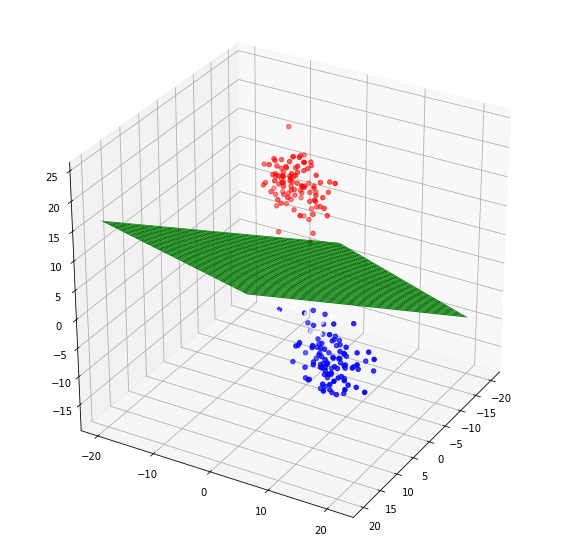

In [ ]:
# Desicion boundary between class 1 (red) and class 2(blue)
c = []
for i in np.array(datafile5):
  if i[3] == 1:
    c.append("r") 
  elif i[3]==2:
    c.append("b")
  else :
    c.append("w")
ax=plt.figure(figsize=[10,10]).gca(projection="3d")
ax.scatter3D(np.array(datafile5[0]) , np.array(datafile5[1]) ,np.array(datafile5[2]),c=c )
x1 = np.linspace(-20,20,100)
x2 = np.linspace(-20,20,100)
X1,X2 = np.meshgrid(x1,x2)
X3 = (A12[0]*X1+A12[1]*X2-b12)/(-A12[2])
ax.plot_surface(X1,X2,X3,color="green")
ax.view_init(30,30)
plt.show()

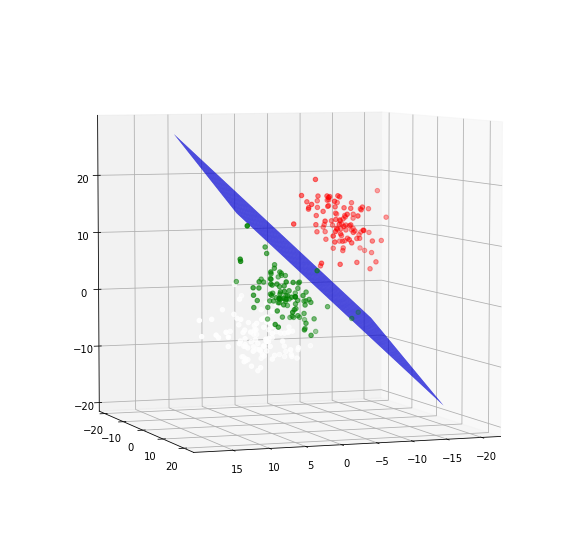

In [ ]:
# Desicion boundary between class 1 (red) and class 3(green)
c = []
for i in np.array(datafile5):
  if i[3] == 1:
    c.append("r") 
  elif i[3]==2:
    c.append("w")
  else :
    c.append("g")
ax=plt.figure(figsize=[10,10]).gca(projection="3d")
ax.scatter3D(np.array(datafile5[0]) , np.array(datafile5[1]) ,np.array(datafile5[2]),c=c )
x1 = np.linspace(-20,10,100)
x2 = np.linspace(-20,10,100)
X1,X2 = np.meshgrid(x1,x2)
X3 = (A13[0]*X1+A13[1]*X2-b13)/(-A13[2])
ax.plot_surface(X1,X2,X3,color="b")
ax.view_init(5,70)
plt.show()

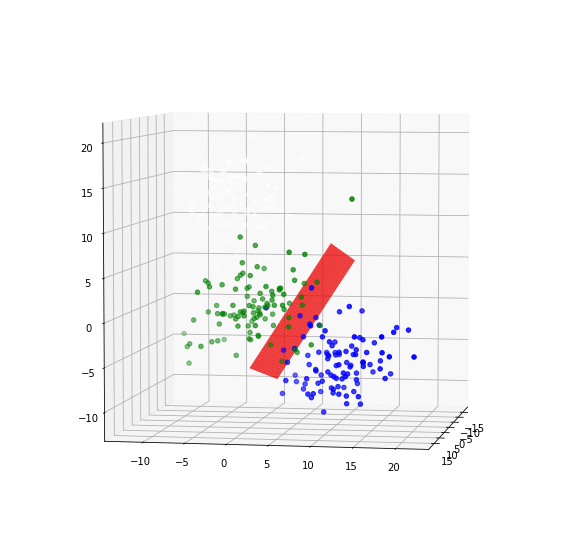

In [ ]:
# Desicion boundary between class 2 (blue) and class 3(green)
c = []
for i in np.array(datafile5):
  if i[3] == 1:
    c.append("w") 
  elif i[3]==2:
    c.append("b")
  else :
    c.append("g")
ax=plt.figure(figsize=[10,10]).gca(projection="3d")
ax.scatter3D(np.array(datafile5[0]) , np.array(datafile5[1]) ,np.array(datafile5[2]),c=c )
x1 = np.linspace(-15,5,100)
x2 = np.linspace(0,10,100)
X1,X2 = np.meshgrid(x1,x2)
X3 = (A23[0]*X1+A23[1]*X2-b23)/(-A23[2])
ax.plot_surface(X1,X2,X3,color="red")
ax.view_init(5,10)
plt.show()

In [ ]:
#Testing
confusion_matrix = np.zeros((4,4)) 
testing_data = dataf5[int(0.7*len(dataf5)):]
for i in range(len(testing_data)):
  cls = 0
  k = sum(A12 * testing_data[i][:-1]) - b12
  if k>= 0:
    l = sum(A13 * testing_data[i][:-1]) - b13
    if l >= 0 :
      cls = 1
    else:
      cls = 3
  else:
    m = sum(A23 * testing_data[i][:-1]) - b23 
    if m>= 0:
      cls = 2
    else:
      cls = 3
  confusion_matrix[cls][int(testing_data[i][-1])] += 1


In [ ]:
confusion_matrix

array([[ 0.,  0.,  0.,  0.],
       [ 0., 25.,  0.,  1.],
       [ 0.,  0., 30.,  5.],
       [ 0.,  0.,  1., 28.]])

In [ ]:
precision = {}
precision[1] = confusion_matrix[1][1]/(sum(confusion_matrix[1]))
precision[2] = confusion_matrix[2][2]/(sum(confusion_matrix[2]))
precision[3] = confusion_matrix[3][3]/(sum(confusion_matrix[3]))

recall = {}
recall[1] = confusion_matrix[1][1]/(sum(confusion_matrix[:,1]))
recall[2] = confusion_matrix[2][2]/(sum(confusion_matrix[:,2]))
recall[3] = confusion_matrix[3][3]/(sum(confusion_matrix[:,3]))

f_score = {}
f_score[1] = (2*precision[1]*recall[1])/(precision[1]+recall[1])
f_score[2] = (2*precision[2]*recall[2])/(precision[2]+recall[2])
f_score[3] = (2*precision[3]*recall[3])/(precision[3]+recall[3])

In [ ]:
print(f_score)

{1: 0.9803921568627451, 2: 0.909090909090909, 3: 0.888888888888889}


#16. Apply multiclass logistic regression and multiclass LDA on Arrhythmia Data Set.

(a) Explain the experimental procedure.

(b) Report the values of the parameters.

(c) Compare the performance of the algorithms by applying statistical measures.

(d) Write report on the results obtained.

In [ ]:
adata = pd.read_csv("/content/drive/MyDrive/Data_Mining_Assignment_03/arrhythmia.data",header=None)
adata

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279
0,75,0,190,80,91,193,371,174,121,-16,13,64,-2,?,63,0,52,44,0,0,32,0,0,0,0,0,0,0,44,20,36,0,28,0,0,0,0,0,0,52,...,0.0,8.4,-10.0,0.0,0.0,0.6,5.9,-3.9,52.7,-0.3,0.0,15.2,-8.4,0.0,0.0,0.9,5.1,17.7,70.7,-0.4,0.0,13.5,-4.0,0.0,0.0,0.9,3.9,25.5,62.9,-0.3,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,37,-17,31,?,53,0,48,0,0,0,24,0,0,0,0,0,0,0,64,0,0,0,24,0,0,0,0,0,0,32,...,0.0,5.8,-7.7,0.0,0.0,0.9,3.8,-5.7,27.7,-0.2,0.0,9.5,-5.0,0.0,0.0,0.5,2.6,11.8,34.6,-0.4,0.0,11.0,-2.4,0.0,0.0,0.4,2.6,21.6,43.4,-0.5,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,34,70,66,23,75,0,40,80,0,0,24,0,0,0,0,0,0,20,56,52,0,0,40,0,0,0,0,0,0,28,...,0.0,5.8,-4.1,4.0,-0.5,0.4,0.3,20.4,23.3,0.7,0.0,10.0,-5.7,0.0,0.0,0.5,2.2,-3.0,20.7,1.3,0.0,11.1,-3.4,0.0,0.0,0.4,3.4,11.5,48.2,0.9,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,11,-5,20,?,71,0,72,20,0,0,48,0,0,0,0,0,0,0,64,36,0,0,36,0,0,0,0,0,0,20,...,0.0,9.0,-7.9,0.0,0.0,0.1,4.1,7.6,51.0,0.4,0.0,15.0,-5.5,0.0,0.0,0.1,3.3,28.8,63.1,0.1,0.0,15.2,-3.7,0.0,0.0,0.6,3.0,36.8,68.0,0.1,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,13,61,3,?,?,0,48,40,0,0,28,0,0,0,0,0,0,0,40,24,0,0,24,0,0,0,0,0,0,52,...,0.0,8.5,-10.2,0.0,0.0,-1.0,4.7,-4.0,43.0,-0.2,0.0,15.2,-7.8,0.0,0.0,-0.1,4.9,16.2,63.2,-0.2,0.0,9.1,-0.9,0.0,0.0,-0.2,2.9,21.7,48.9,-0.4,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,53,1,160,70,80,199,382,154,117,-37,4,40,-27,?,63,0,52,24,0,0,28,0,0,0,0,0,0,0,44,40,0,0,32,0,0,0,0,0,0,0,...,0.0,1.3,-9.2,0.0,0.0,-0.1,2.2,-22.1,3.8,0.2,0.0,2.9,-10.3,0.0,0.0,0.8,1.4,-20.1,-9.5,0.1,0.0,4.1,-8.3,0.0,0.0,0.8,1.0,-8.4,-0.6,0.0,0.0,4.3,-5.0,0.0,0.0,0.7,0.6,-4.4,-0.5,1
448,37,0,190,85,100,137,361,201,73,86,66,52,79,?,73,0,44,36,0,0,24,0,0,0,0,0,0,0,56,0,0,0,32,0,0,0,0,0,0,0,...,0.0,12.2,-5.4,0.0,0.0,-0.3,10.8,27.7,137.8,0.1,0.0,22.5,-3.5,0.9,0.0,0.7,5.9,69.2,129.3,-0.7,0.0,21.2,-2.8,0.0,0.0,0.4,3.7,50.7,82.5,-0.5,0.0,15.6,-1.6,0.0,0.0,0.4,2.4,38.0,62.4,10
449,36,0,166,68,108,176,365,194,116,-85,-19,-61,-70,84,84,16,40,40,0,0,40,0,0,0,0,0,0,0,40,56,0,0,32,0,0,0,0,0,0,0,...,0.0,18.3,-34.1,0.0,0.0,1.4,-8.2,-75.7,-146.2,-0.4,0.0,20.6,-36.7,0.0,0.0,1.0,-8.2,-71.2,-161.4,0.2,0.0,22.0,-30.8,0.0,0.0,1.9,-2.5,-39.6,-63.6,1.2,0.0,16.3,-28.6,0.0,0.0,1.5,1.0,-44.2,-33.2,2
450,32,1,155,55,93,106,386,218,63,54,29,-22,43,103,80,0,56,0,0,0,32,0,0,0,0,0,0,16,64,0,0,0,40,0,0,0,0,0,0,16,...,0.0,8.8,-7.7,0.0,0.0,0.9,7.3,3.9,94.4,0.4,0.0,11.9,-6.7,0.0,0.0,0.6,3.8,17.5,56.2,0.1,0.0,15.3,-3.5,0.0,0.0,0.4,3.2,29.7,61.0,0.2,-0.4,12.0,-0.7,0.0,0.0,0.5,2.4,25.0,46.6,1


In [ ]:
keys = []
for (k,v) in dict((adata != 0).any(axis=0)).items():
  if not v:
    keys.append(k)
print(keys)

[19, 67, 69, 83, 131, 132, 139, 141, 143, 145, 151, 156, 157, 164, 204, 264, 274]


In [ ]:
adata = adata.drop(columns=keys)

In [ ]:
adata[279] =adata[279].replace(14,11)
adata[279] =adata[279].replace(15,12)
adata[279] =adata[279].replace(16,13)

In [ ]:
x = dict(adata[279].value_counts())
print(x)

{1: 245, 10: 50, 2: 44, 6: 25, 13: 22, 4: 15, 3: 15, 5: 13, 9: 9, 12: 5, 11: 4, 7: 3, 8: 2}


In [ ]:
adata = adata.replace('?',0)

In [ ]:
w = np.zeros((len(x),len(adata[0])-1))

In [ ]:
pi = np.zeros(len(x)+1)
total = 0
for i in range(1,len(pi)):
  pi[i] = x[i]
  total += x[i]
pi = pi / total
print(pi)

[0.         0.5420354  0.09734513 0.03318584 0.03318584 0.02876106
 0.05530973 0.00663717 0.00442478 0.0199115  0.11061947 0.00884956
 0.01106195 0.04867257]


In [ ]:
adata_set = np.array(adata,dtype=float)
# np.random.shuffle(adata_set)
training = adata_set

In [ ]:
u = np.zeros((  len(x)+1  ,  len(training[0])-1 ))
for i in range(len(training)):
  k = int(training[i][-1])
  u[k] += (training[i][:-1]/x[k])
print(u)

[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 4.62734694e+01  6.53061224e-01  1.64102041e+02 ...  1.59795918e+00
   2.03114286e+01  3.38367347e+01]
 [ 5.17500000e+01  5.90909091e-01  1.63068182e+02 ... -6.00000000e-01
   2.03136364e+01  1.37954545e+01]
 ...
 [ 1.95000000e+01  2.50000000e-01  1.56000000e+02 ...  1.35000000e+00
   3.42000000e+01  4.29500000e+01]
 [ 5.74000000e+01  8.00000000e-01  1.61400000e+02 ...  1.66533454e-16
   1.69400000e+01  1.69800000e+01]
 [ 4.42727273e+01  3.18181818e-01  1.65000000e+02 ...  1.05000000e+00
   1.98636364e+01  2.96818182e+01]]


In [ ]:
E = np.zeros((len(x)+1,len(training[0])-1,len(training[0])-1))
for i in range(len(training)):
  k = int(training[i][-1])
  j = training[i][:-1] - u[k]
  E[k] += (j.reshape(-1,1) * j)
E = sum(E)/(total-len(x))
E

array([[ 2.41132557e+02, -3.10745684e-01, -4.11750098e+01, ...,
        -3.41928949e+00, -3.96631262e+00, -4.16868632e+01],
       [-3.10745684e-01,  2.25225698e-01, -2.43838509e+00, ...,
         2.40020264e-02, -8.72599119e-02, -3.11296709e-02],
       [-4.11750098e+01, -2.43838509e+00,  1.27482702e+03, ...,
        -1.48580037e+00, -6.74720427e+00, -3.24042399e+01],
       ...,
       [-3.41928949e+00,  2.40020264e-02, -1.48580037e+00, ...,
         1.34094804e+00, -6.24363422e-01,  1.33414409e+01],
       [-3.96631262e+00, -8.72599119e-02, -6.74720427e+00, ...,
        -6.24363422e-01,  1.45409190e+02,  1.36123373e+02],
       [-4.16868632e+01, -3.11296709e-02, -3.24042399e+01, ...,
         1.33414409e+01,  1.36123373e+02,  2.83131569e+02]])

In [ ]:
A = np.zeros( 
    ( len(x)+1 , len(x)+1 , 1 , len(training[0])-1  ) 
    )
b = np.zeros(( len(x)+1 , len(x)+1 ))

for i in range(len(A)):
  for j in range(i+1,len(A)):

    A[i][j] = np.matmul((u[i]-u[j]),np.linalg.inv(E))
    b[i][j] =  -np.log(pi[i]/pi[j]) + 0.5*(np.matmul( np.matmul( (u[i]+u[j]) ,  np.linalg.inv(E) ) , (u[i]-u[j]).reshape(-1,1)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
cm = np.zeros((len(x)+1,len(x)+1))

In [ ]:
for m in range(len(adata_set)):
  cls = 0
  i = 1
  while(i < len(A)):
    j = i+1
    while(j<len(A)):
     k  = sum(A[i][j][0] * adata_set[m][:-1]) - b[i][j]
      if k < 0:
        i = j-1
        break
      j+=1
    else:
      cls = i
      break
    i += 1
  else:
    cls = i
  cm[i][int(adata_set[m][-1])] += 1

In [ ]:
cm

array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.],
       [  0., 235.,   8.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   1.,
          0.,   0.,   1.],
       [  0.,   0.,  33.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.],
       [  0.,   0.,   0.,  15.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,  15.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,  13.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.],
       [  0.,   5.,   0.,   0.,   0.,   0.,  25.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   2.,   0.,   0.,   0.,
          0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   2.,   0.,   0.,
          0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   9.,   0.,
          0.,   0

In [ ]:


precision = np.zeros(len(cm))
recall = np.zeros(len(cm))
f_score = np.zeros(len(cm))

for i in range(1,len(precision)):
  precision[i] = cm[i][i]/(sum(cm[i]))
  recall[i] = cm[i][i]/(sum(cm[:,i]))
  f_score[i] = (2*precision[i]*recall[i])/(precision[i]+recall[i])

In [ ]:
fscore = {k:v for k,v in enumerate(f_score)}
del(fscore[0])
print("F Scores of each class are")
for k,v in fscore.items():
  print(f"Class {k} : F-score {v}")


F Scores of each class are
Class 1 : F-score 0.9572301425661914
Class 2 : F-score 0.8571428571428571
Class 3 : F-score 1.0
Class 4 : F-score 1.0
Class 5 : F-score 1.0
Class 6 : F-score 0.9090909090909091
Class 7 : F-score 0.8
Class 8 : F-score 1.0
Class 9 : F-score 1.0
Class 10 : F-score 0.9702970297029702
Class 11 : F-score 1.0
Class 12 : F-score 0.9090909090909091
Class 13 : F-score 0.875


# 15. Apply logistic regression and LDA on Heart Disease data set.

(a) Apply k fold and hold out cross validation techniques.

(b) Report the preprocessing techniques if any.

(c) Report the value of the performance measures used.

(d) Compare the performance of the algorithms by using statistical measures.

In [ ]:
hddata = pd.read_csv("/content/drive/MyDrive/Data_Mining_Assignment_03/reprocessed.hungarian.data",header=None,sep=" ")
hddata

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,40.0,1.0,2.0,140.0,289.0,0.0,0.0,172.0,0.0,0.0,-9.0,-9.0,-9.0,0.0
1,49.0,0.0,3.0,160.0,180.0,0.0,0.0,156.0,0.0,1.0,2.0,-9.0,-9.0,1.0
2,37.0,1.0,2.0,130.0,283.0,0.0,1.0,98.0,0.0,0.0,-9.0,-9.0,-9.0,0.0
3,48.0,0.0,4.0,138.0,214.0,0.0,0.0,108.0,1.0,1.5,2.0,-9.0,-9.0,3.0
4,54.0,1.0,3.0,150.0,-9.0,0.0,0.0,122.0,0.0,0.0,-9.0,-9.0,-9.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290,36.0,1.0,2.0,120.0,166.0,0.0,0.0,180.0,0.0,0.0,-9.0,-9.0,-9.0,0.0
291,48.0,1.0,3.0,110.0,211.0,0.0,0.0,138.0,0.0,0.0,-9.0,-9.0,6.0,0.0
292,47.0,0.0,2.0,140.0,257.0,0.0,0.0,135.0,0.0,1.0,1.0,-9.0,-9.0,0.0
293,53.0,1.0,4.0,130.0,182.0,0.0,0.0,148.0,0.0,0.0,-9.0,-9.0,-9.0,0.0


In [ ]:
np.isnan(hddata)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290,False,False,False,False,False,False,False,False,False,False,False,False,False,False
291,False,False,False,False,False,False,False,False,False,False,False,False,False,False
292,False,False,False,False,False,False,False,False,False,False,False,False,False,False
293,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
keys = []
for (k,v) in dict((np.isnan(hddata)).all(axis=1)).items():
  if v:
    keys.append(k)

print(keys)

[294]


In [ ]:
hddata = hddata.drop(keys,axis=0)

In [ ]:
hddata

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,40.0,1.0,2.0,140.0,289.0,0.0,0.0,172.0,0.0,0.0,-9.0,-9.0,-9.0,0.0
1,49.0,0.0,3.0,160.0,180.0,0.0,0.0,156.0,0.0,1.0,2.0,-9.0,-9.0,1.0
2,37.0,1.0,2.0,130.0,283.0,0.0,1.0,98.0,0.0,0.0,-9.0,-9.0,-9.0,0.0
3,48.0,0.0,4.0,138.0,214.0,0.0,0.0,108.0,1.0,1.5,2.0,-9.0,-9.0,3.0
4,54.0,1.0,3.0,150.0,-9.0,0.0,0.0,122.0,0.0,0.0,-9.0,-9.0,-9.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,48.0,0.0,2.0,-9.0,308.0,0.0,1.0,-9.0,-9.0,2.0,1.0,-9.0,-9.0,0.0
290,36.0,1.0,2.0,120.0,166.0,0.0,0.0,180.0,0.0,0.0,-9.0,-9.0,-9.0,0.0
291,48.0,1.0,3.0,110.0,211.0,0.0,0.0,138.0,0.0,0.0,-9.0,-9.0,6.0,0.0
292,47.0,0.0,2.0,140.0,257.0,0.0,0.0,135.0,0.0,1.0,1.0,-9.0,-9.0,0.0


In [ ]:
hddata = hddata.replace(-9,0)

In [ ]:
hddata

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,40.0,1.0,2.0,140.0,289.0,0.0,0.0,172.0,0.0,0.0,0.0,0.0,0.0,0.0
1,49.0,0.0,3.0,160.0,180.0,0.0,0.0,156.0,0.0,1.0,2.0,0.0,0.0,1.0
2,37.0,1.0,2.0,130.0,283.0,0.0,1.0,98.0,0.0,0.0,0.0,0.0,0.0,0.0
3,48.0,0.0,4.0,138.0,214.0,0.0,0.0,108.0,1.0,1.5,2.0,0.0,0.0,3.0
4,54.0,1.0,3.0,150.0,0.0,0.0,0.0,122.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,48.0,0.0,2.0,0.0,308.0,0.0,1.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0
290,36.0,1.0,2.0,120.0,166.0,0.0,0.0,180.0,0.0,0.0,0.0,0.0,0.0,0.0
291,48.0,1.0,3.0,110.0,211.0,0.0,0.0,138.0,0.0,0.0,0.0,0.0,6.0,0.0
292,47.0,0.0,2.0,140.0,257.0,0.0,0.0,135.0,0.0,1.0,1.0,0.0,0.0,0.0


In [ ]:
adata_set = np.array(hddata,dtype=float)
np.random.shuffle(adata_set)
training = adata_set[:int(0.8*(len(adata_set)))]

In [ ]:
import collections

x = dict(collections.Counter(training[:,-1]))
# x = dict(hddata[13].value_counts())
x

{0.0: 150, 1.0: 30, 2.0: 18, 3.0: 25, 4.0: 12}

In [ ]:
pi = np.zeros(len(x))
total = 0
for i in range(0,len(pi)):
  pi[i] = x[i]
  total += x[i]
pi = pi / total
print(pi)

[0.63945578 0.12585034 0.08843537 0.0952381  0.05102041]


In [ ]:
u = np.zeros((  len(x) ,  len(training[0])-1 ))
for i in range(len(training)):
  k = int(training[i][-1])
  u[k] += (training[i][:-1]/x[k])
print(u)

[[3.73936170e+01 5.05319149e-01 2.05851064e+00 1.03122340e+02
  1.68563830e+02 3.19148936e-02 1.75531915e-01 1.15351064e+02
  4.78723404e-02 1.45212766e-01 1.75531915e-01 4.78723404e-02
  2.55319149e-01]
 [3.80270270e+01 7.02702703e-01 2.89189189e+00 1.05162162e+02
  1.96297297e+02 5.40540541e-02 5.40540541e-02 1.10135135e+02
  4.05405405e-01 7.70270270e-01 1.02702703e+00 0.00000000e+00
  8.91891892e-01]
 [3.41923077e+01 6.53846154e-01 2.61538462e+00 9.84615385e+01
  1.64230769e+02 7.69230769e-02 1.15384615e-01 8.60000000e+01
  5.00000000e-01 8.26923077e-01 9.23076923e-01 0.00000000e+00
  4.61538462e-01]
 [4.71071429e+01 7.85714286e-01 3.00000000e+00 1.27178571e+02
  2.42642857e+02 1.78571429e-01 2.85714286e-01 1.08750000e+02
  6.78571429e-01 1.28571429e+00 1.50000000e+00 0.00000000e+00
  2.50000000e-01]
 [3.94000000e+01 6.00000000e-01 3.00000000e+00 1.15333333e+02
  2.51000000e+02 6.66666667e-02 2.66666667e-01 9.90000000e+01
  6.66666667e-01 1.73333333e+00 1.33333333e+00 0.00000000e+0

In [ ]:
E = np.zeros((len(x),len(training[0])-1,len(training[0])-1))
for i in range(len(training)):
  k = int(training[i][-1])
  j = training[i][:-1] - u[k]
  E[k] += (j.reshape(-1,1) * j)
E = sum(E)/(total-len(x))
E

array([[ 1.21874742e+02,  1.04767509e+00,  5.14146176e+00,
         2.33740408e+02,  3.72952879e+02,  2.88471329e-01,
         5.24743428e-01,  1.61789231e+02,  6.40523591e-01,
         1.12781730e+00,  1.42208363e+00,  9.49234885e-02,
         4.03904136e-01],
       [ 1.04767509e+00,  1.70973744e-01,  1.34553958e-01,
         3.66618193e+00,  4.80099898e+00,  3.12944416e-03,
        -3.88125778e-03,  3.49314301e+00,  7.45582757e-03,
         1.61972543e-02, -1.12702695e-02, -1.89173811e-02,
        -1.53770376e-02],
       [ 5.14146176e+00,  1.34553958e-01,  8.92010112e-01,
         1.43106888e+01,  2.27957283e+01, -2.67456106e-03,
         1.11717932e-02,  9.77473701e+00,  1.12715872e-01,
         1.36428936e-01,  1.59423374e-01,  4.75040374e-02,
         6.10412432e-02],
       [ 2.33740408e+02,  3.66618193e+00,  1.43106888e+01,
         8.90966804e+02,  9.54896974e+02,  4.91862468e-01,
         8.46672792e-01,  6.56495333e+02,  2.08408373e+00,
         3.13120800e+00,  3.57418992e

In [ ]:
A = np.zeros( 
    ( len(x) , len(x) , 1 , len(training[0])-1  ) 
    )
b = np.zeros(( len(x) , len(x) ))

for i in range(len(A)):
  for j in range(i+1,len(A)):

    A[i][j] = np.matmul((u[i]-u[j]),np.linalg.inv(E))
    b[i][j] =  -np.log(pi[i]/pi[j]) + 0.5*(np.matmul( np.matmul( (u[i]+u[j]) ,  np.linalg.inv(E) ) , (u[i]-u[j]).reshape(-1,1)))

In [ ]:
cm = np.zeros((len(x),len(x)))

In [ ]:
testing = adata_set[int(0.8*(len(adata_set))):]
for m in range(len(testing)):
  cls = 0
  i = 0
  while(i < len(A)):
    j = i+1
    while(j<len(A)):
     k  = sum(A[i][j][0] * testing[m][:-1]) - b[i][j]
     if k < 0:
        i = j-1
        break
     j+=1
    else:
      cls = i
      break
    i += 1
  else:
    cls = i
  cm[i][int(testing[m][-1])] += 1

In [ ]:
cm

array([[31.,  3.,  3.,  2.,  0.],
       [ 5.,  2.,  0.,  0.,  0.],
       [ 1.,  0.,  2.,  0.,  1.],
       [ 1.,  1.,  2.,  1.,  2.],
       [ 0.,  1.,  1.,  0.,  0.]])

In [ ]:


precision = np.zeros(len(cm))
recall = np.zeros(len(cm))
f_score = np.zeros(len(cm))

for i in range(0,len(precision)):
  precision[i] = cm[i][i]/(sum(cm[i]))
  recall[i] = cm[i][i]/(sum(cm[:,i]))
  f_score[i] = (2*precision[i]*recall[i])/(precision[i]+recall[i])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
fscore = {k:v for k,v in enumerate(f_score)}
del(fscore[0])
print("F Scores of each class are")
for k,v in fscore.items():
  print(f"Class {k} : F-score {v}")


F Scores of each class are
Class 1 : F-score 0.2857142857142857
Class 2 : F-score 0.3333333333333333
Class 3 : F-score 0.2
Class 4 : F-score nan
